# Stock Market Analysis on Car Industry
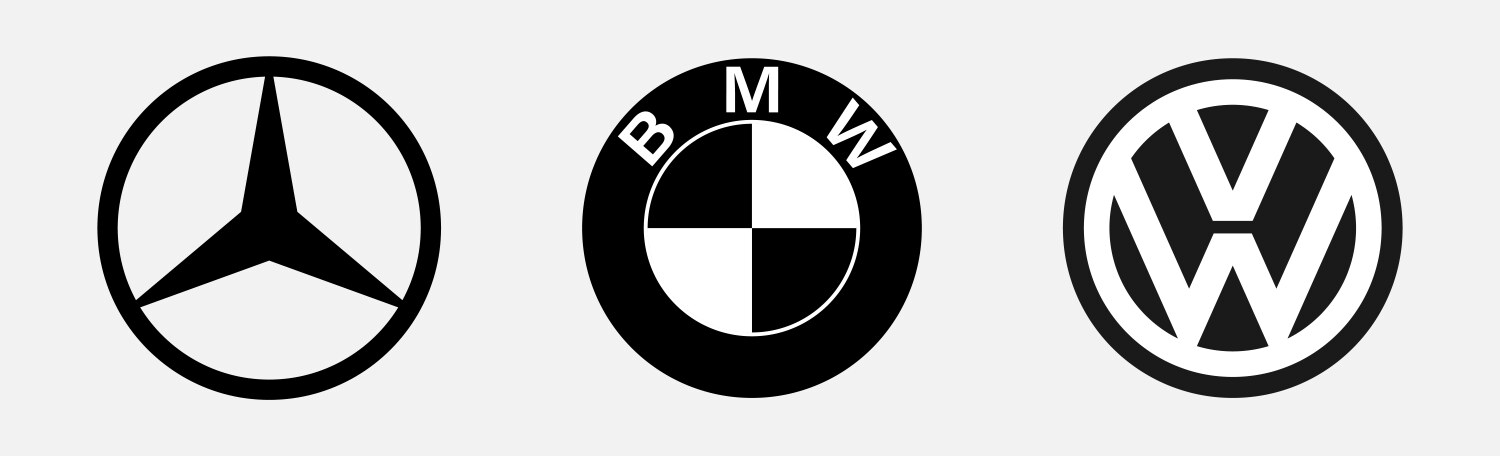

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
warnings.filterwarnings('ignore')

yf.pdr_override()
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# The auto stocks we'll use for this analysis
auto_list = ['BMWYY', 'MBGAF', 'VWAGY']

# Datetime is using for data extraction between the day last year and now. 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in auto_list:
    # Using globals() is a way of setting the DataFrame names.
    globals()[stock] = yf.download(stock, start, end)
    
# There are 3 automobile companies in the list.
company_list = [BMWYY, MBGAF, VWAGY]
company_name = ['BMW', 'Mercedes Benz Group', 'Volkswagen']

# With loop, we will define new columns as 'Name_Of_Company' from company_name list.
for company, com_name in zip(company_list, company_name):
    company["Name_Of_Company"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1. Open: The opening price of a financial asset, such as a stock, represents the price at which the first transaction occurred for that asset during a particular trading session, typically at the beginning of the trading day.

2. High: The high price is the highest price at which the asset traded during the trading session. It represents the peak value reached by the asset's price within the given time frame, whether it's a day, week, month, etc.(In that project we have daily assets prices.)

3. Low: The low price is the lowest price at which the asset traded during the trading session. It represents the lowest value reached by the asset's price within the given time frame.

4. Close: The closing price of a financial asset is the last price at which the asset traded during the trading session. It represents the final value of the asset at the end of the trading day.

5. Adj Close (Adjusted Close): The adjusted closing price is a modification of the closing price to account for any corporate actions or events that may affect the price but are not directly related to the asset's performance. This adjustment can include factors such as dividends, stock splits, or mergers. The adjusted closing price provides a more accurate reflection of the asset's true value over time by adjusting for these external factors.

6. Volume: Volume refers to the total number of shares (or contracts, in the case of options or futures) that are traded during a given period of time, typically within a single trading session (e.g., a day) or over a specified time frame (e.g., a week, month, etc.). It reflects the level of activity or liquidity in a particular stock or market and is an important indicator of investor sentiment and trading activity.

In [3]:
df.tail(10) # Show the last 10 rows in dataset.

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2024-04-16,15.04,15.10,14.970,15.000,15.000,127300,Volkswagen
2024-04-17,15.01,15.04,14.900,15.000,15.000,122100,Volkswagen
2024-04-18,14.99,15.12,14.973,15.030,15.030,432100,Volkswagen
2024-04-19,14.94,15.05,14.940,14.980,14.980,146000,Volkswagen
2024-04-22,14.80,14.92,14.740,14.910,14.910,372000,Volkswagen
2024-04-23,14.80,15.03,14.800,15.010,15.010,135900,Volkswagen
2024-04-24,14.90,14.95,14.810,14.840,14.840,256600,Volkswagen
2024-04-25,14.63,14.69,14.500,14.675,14.675,256800,Volkswagen
2024-04-26,14.93,14.95,14.801,14.860,14.860,90200,Volkswagen


In [4]:
VWAGY.shape
# Here we can say, we have the last year's Volkswagen datas excluding weekends.

(251, 7)

In [5]:
VWAGY.info()
# As we can see 2. cell's output, our datas ara numerical for all rows except 'Name_Of_Company'.
# Also we can check here the datatype of columns and null values.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-05-01 to 2024-04-29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             251 non-null    float64
 1   High             251 non-null    float64
 2   Low              251 non-null    float64
 3   Close            251 non-null    float64
 4   Adj Close        251 non-null    float64
 5   Volume           251 non-null    int64  
 6   Name_Of_Company  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [6]:
VWAGY.describe() # That is the basic statistical result of the Volkswagen datas.

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,14.508849,14.596761,14.409606,14.501633,14.471965,2.729308e+05
std,1.528398,1.530290,1.523056,1.526454,1.491113,1.427923e+05
min,11.330000,11.390000,11.160000,11.170000,11.170000,7.292900e+04
25%,13.165000,13.225000,13.070000,13.135000,13.135000,1.742000e+05
50%,14.590000,14.640000,14.450000,14.520000,14.520000,2.388000e+05
75%,15.800000,15.875000,15.680000,15.775000,15.688200,3.428500e+05
max,17.500000,17.530001,17.330000,17.459999,17.459999,1.028700e+06


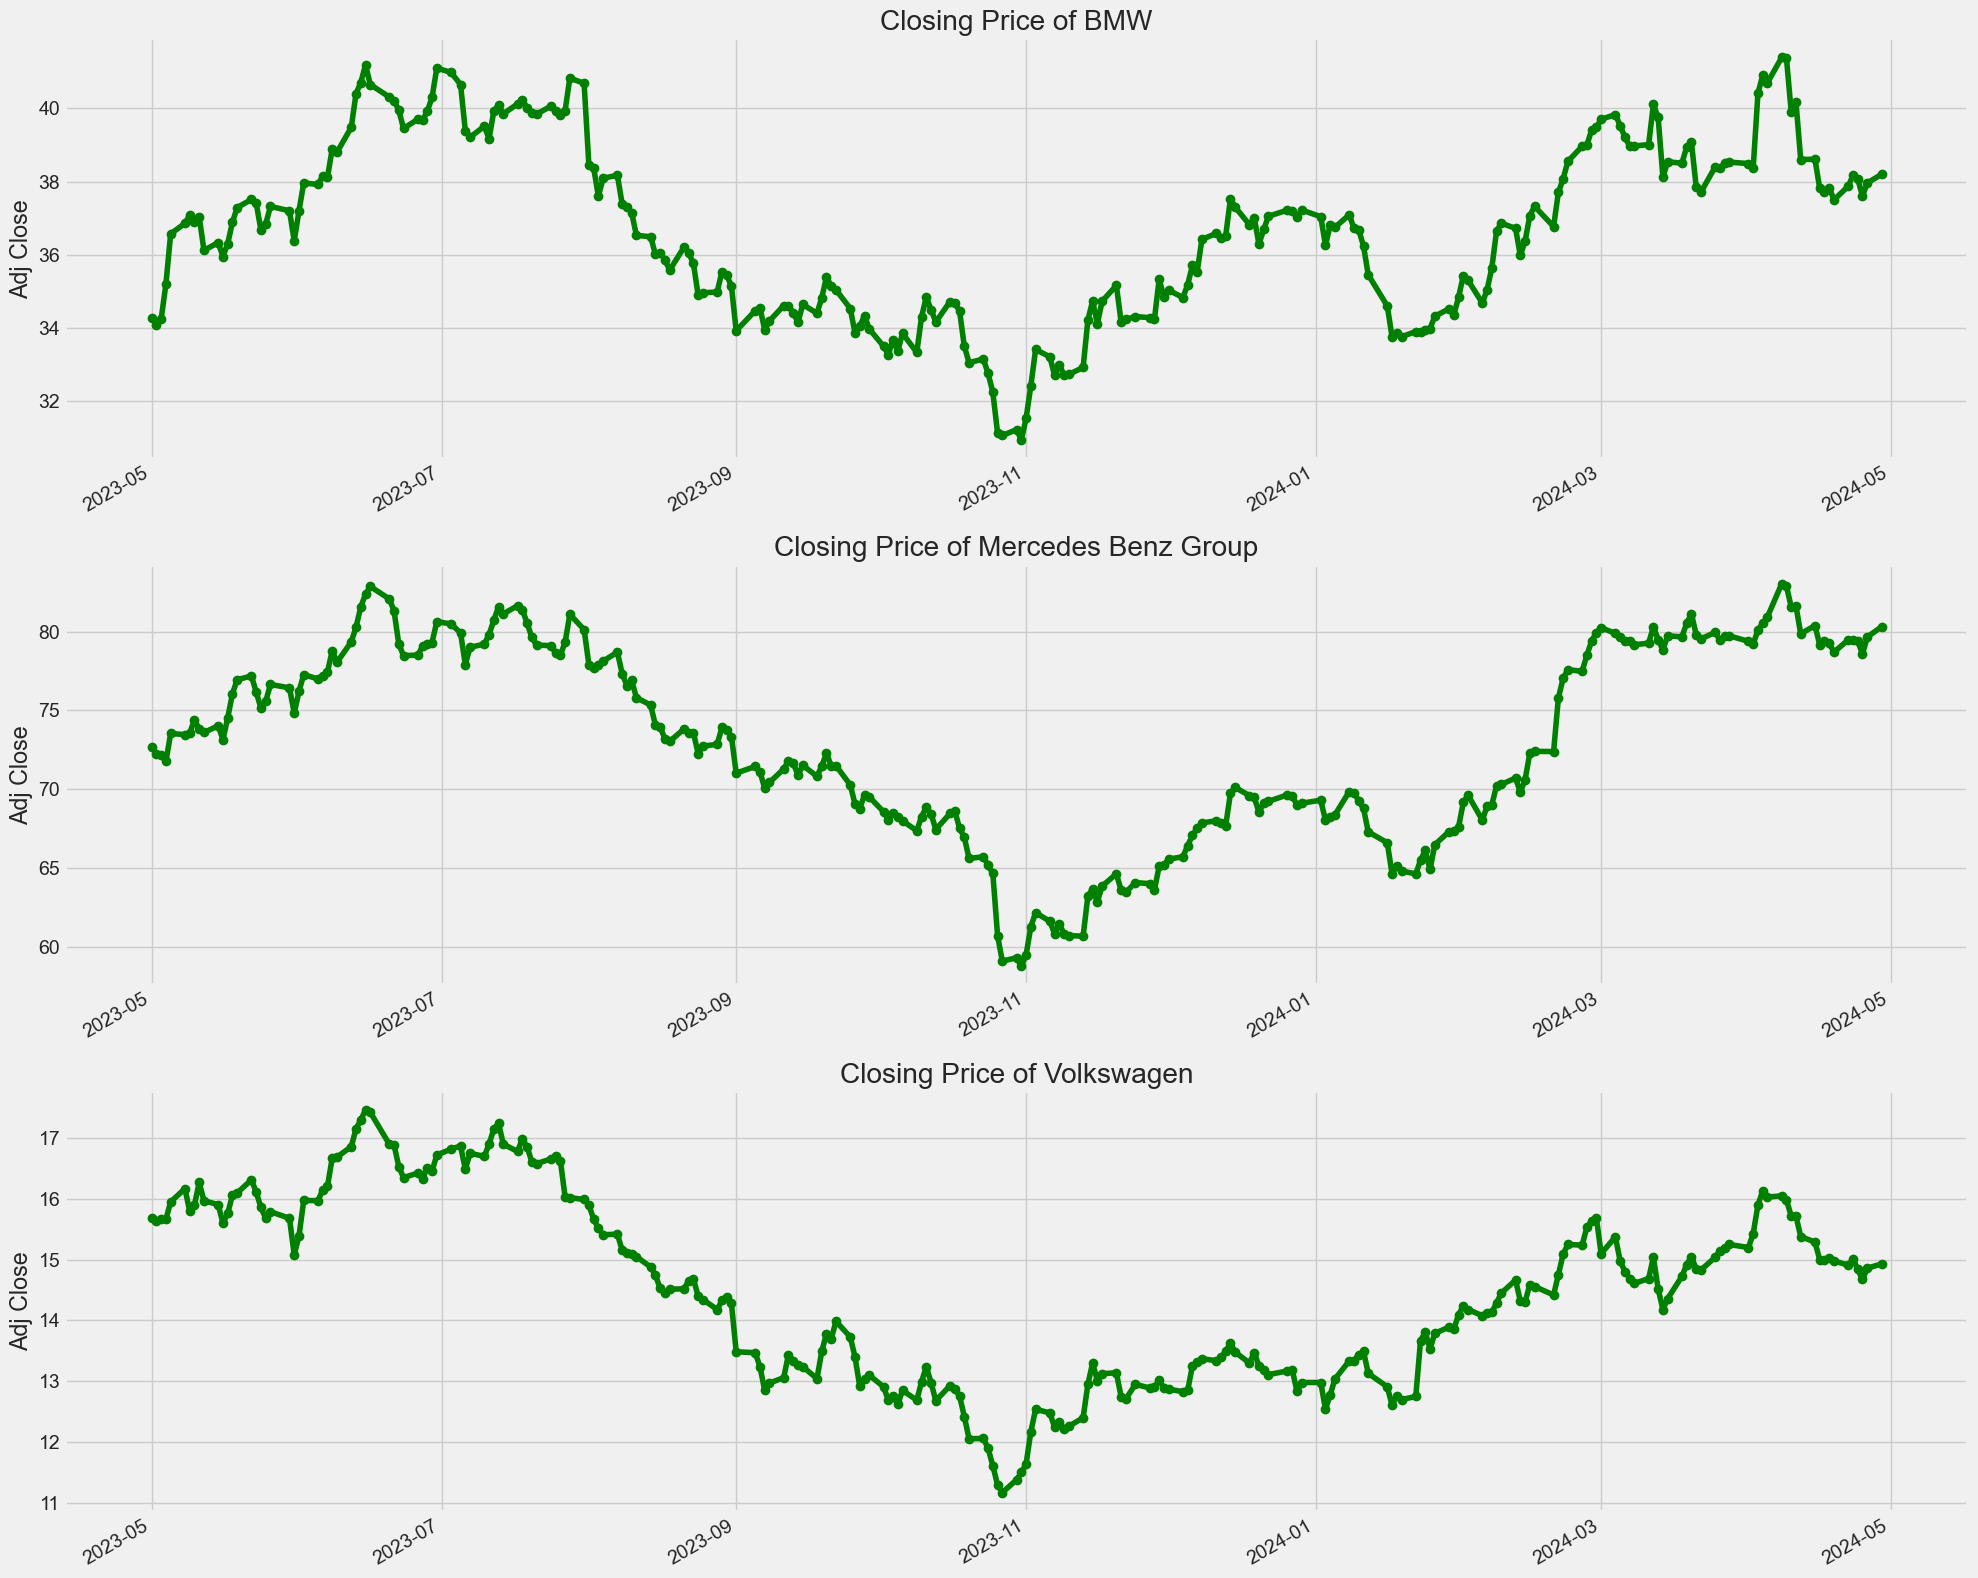

In [7]:
# In here we can visualize the historical Adj Close datas.
plt.figure(figsize=(20, 16))
plt.subplots_adjust(top=1.5, bottom=1.25)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Adj Close'].plot(color='green',marker = 'o')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

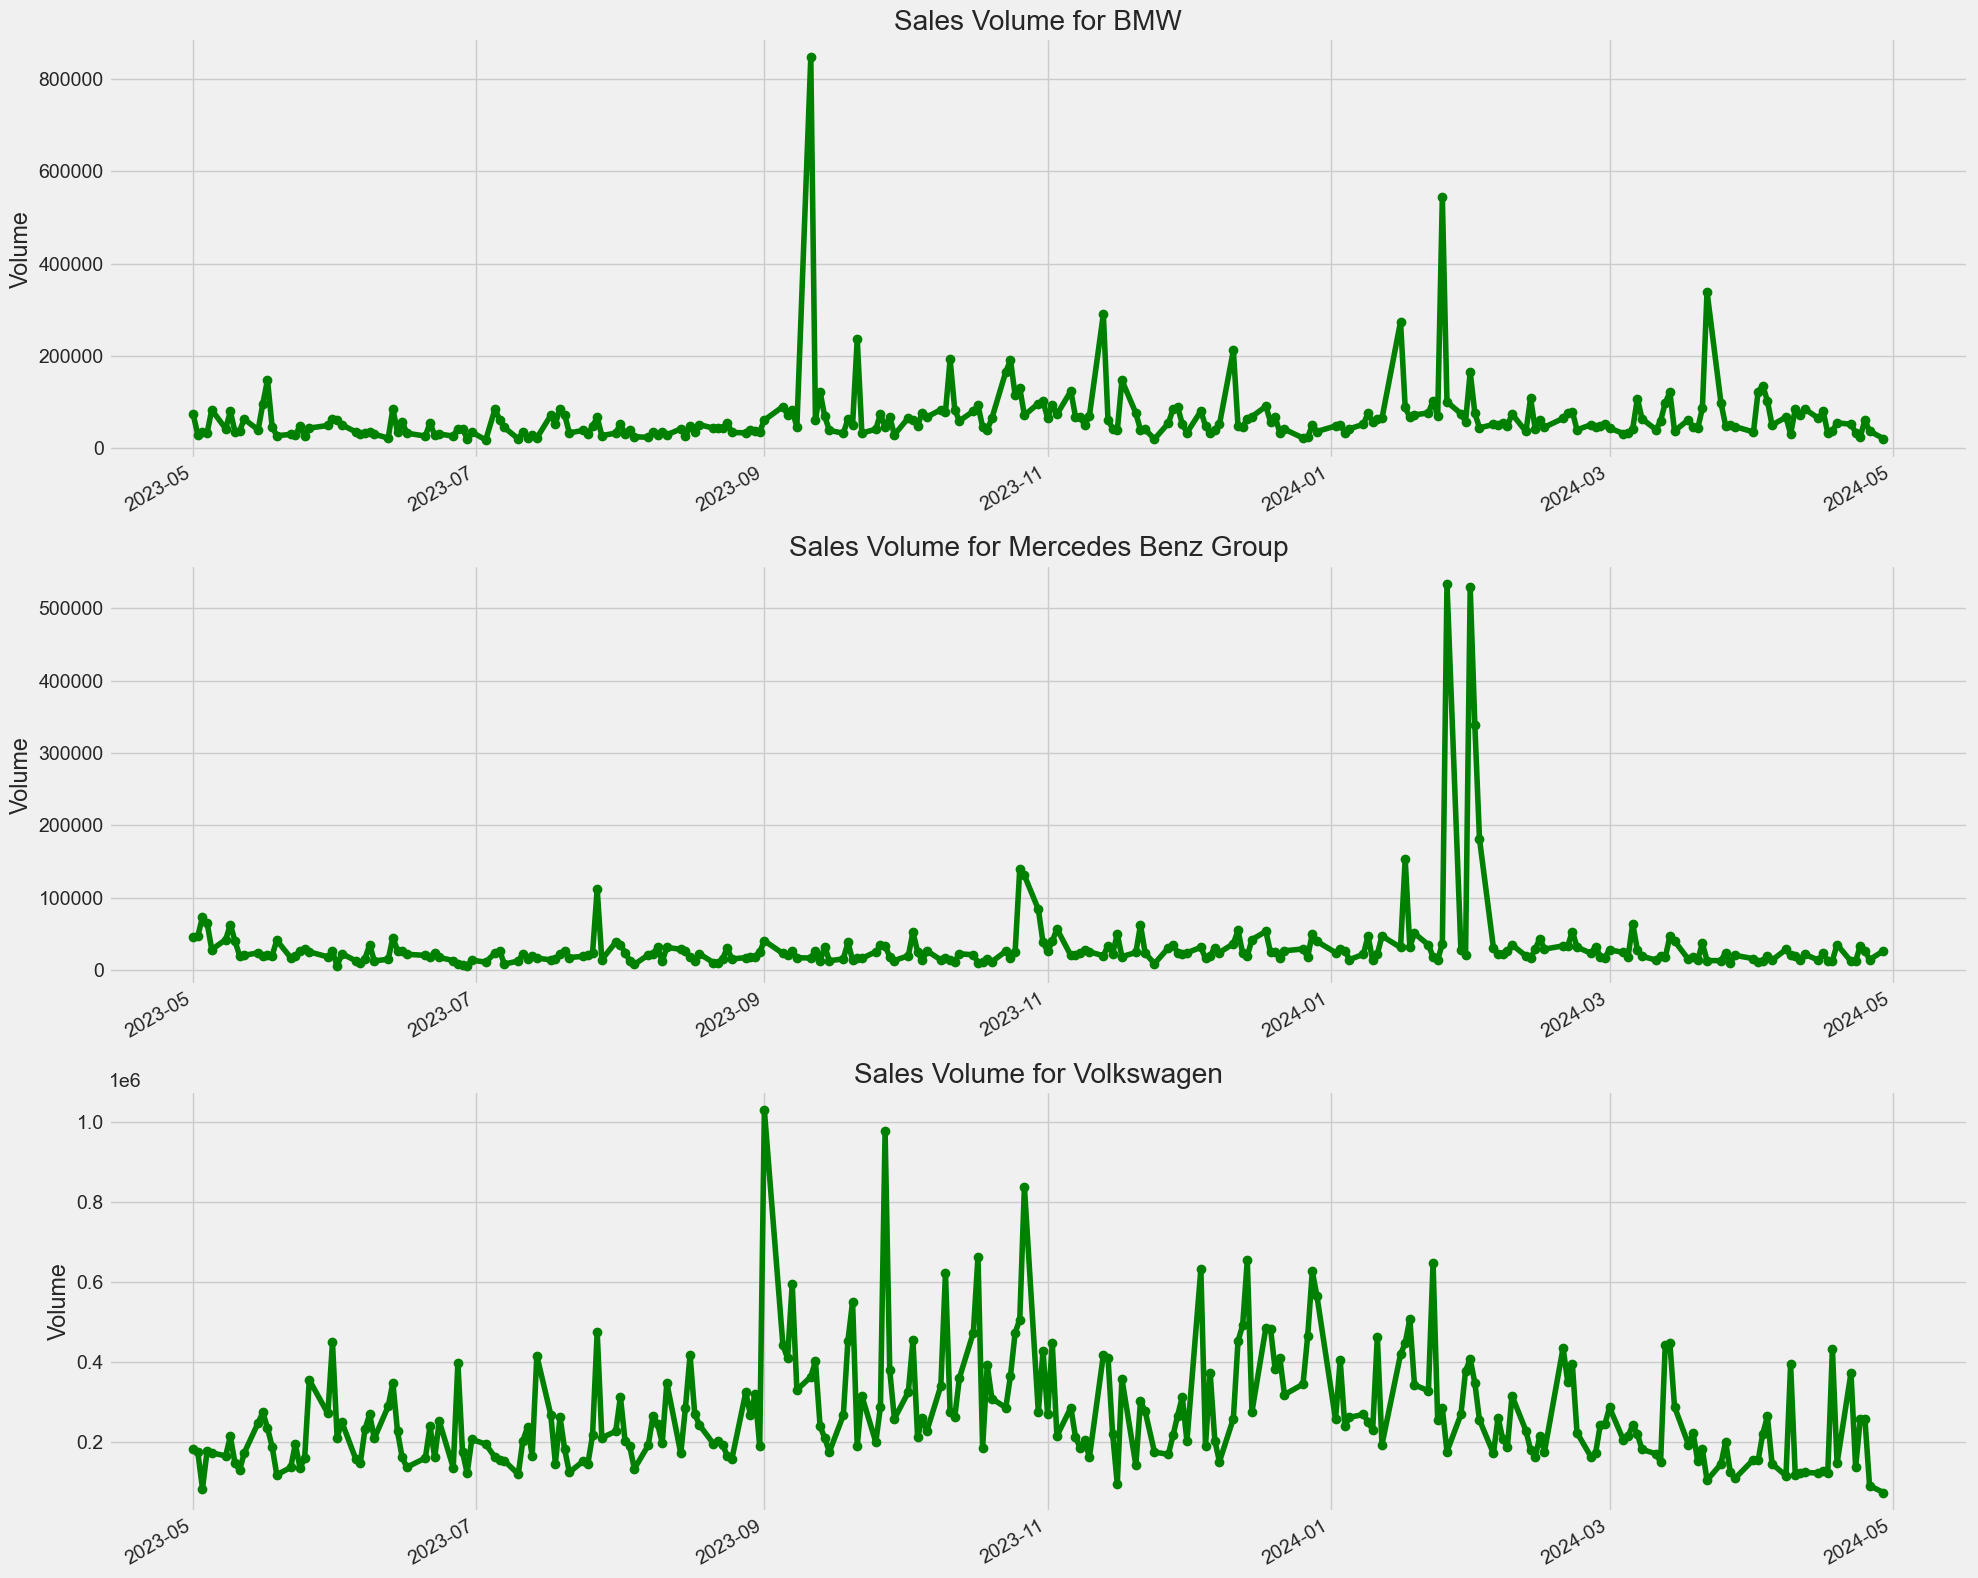

In [8]:
# Right now we can visualize the total volume of stock being traded each day
plt.figure(figsize=(20, 16))
plt.subplots_adjust(top=1.5, bottom=1.25)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Volume'].plot(color='green',marker = 'o')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

In [9]:
BMWYY[BMWYY['Volume'] > 200000]

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company
Date,,,,,,,
2023-09-11,34.720001,34.720001,34.430000,34.610001,34.610001,847500,BMW
2023-09-21,35.380001,35.549999,35.139999,35.139999,35.139999,236200,BMW
2023-11-13,32.730000,33.000000,32.520000,32.919998,32.919998,290100,BMW
2023-12-11,36.389999,36.709999,36.290001,36.580002,36.580002,211600,BMW
2024-01-16,34.660000,34.860001,34.470001,34.599998,34.599998,273700,BMW
2024-01-25,33.750000,33.980000,33.520000,33.980000,33.980000,543700,BMW
2024-03-22,37.480000,37.770000,37.340000,37.709999,37.709999,339000,BMW


Here we can say, there are some outliers value in BMW stocks. 
For example, this company may have made news of a major earnings release or a deal announcement. This can greatly increase the trading volume of the stock.

# Moving Average(MA) Method

The moving average of a stock is a calculated indicator that smooths out price data by creating a constantly updated average price. It is calculated by adding the closing prices of a stock over a certain number of trading days and then dividing this total by the number of days.

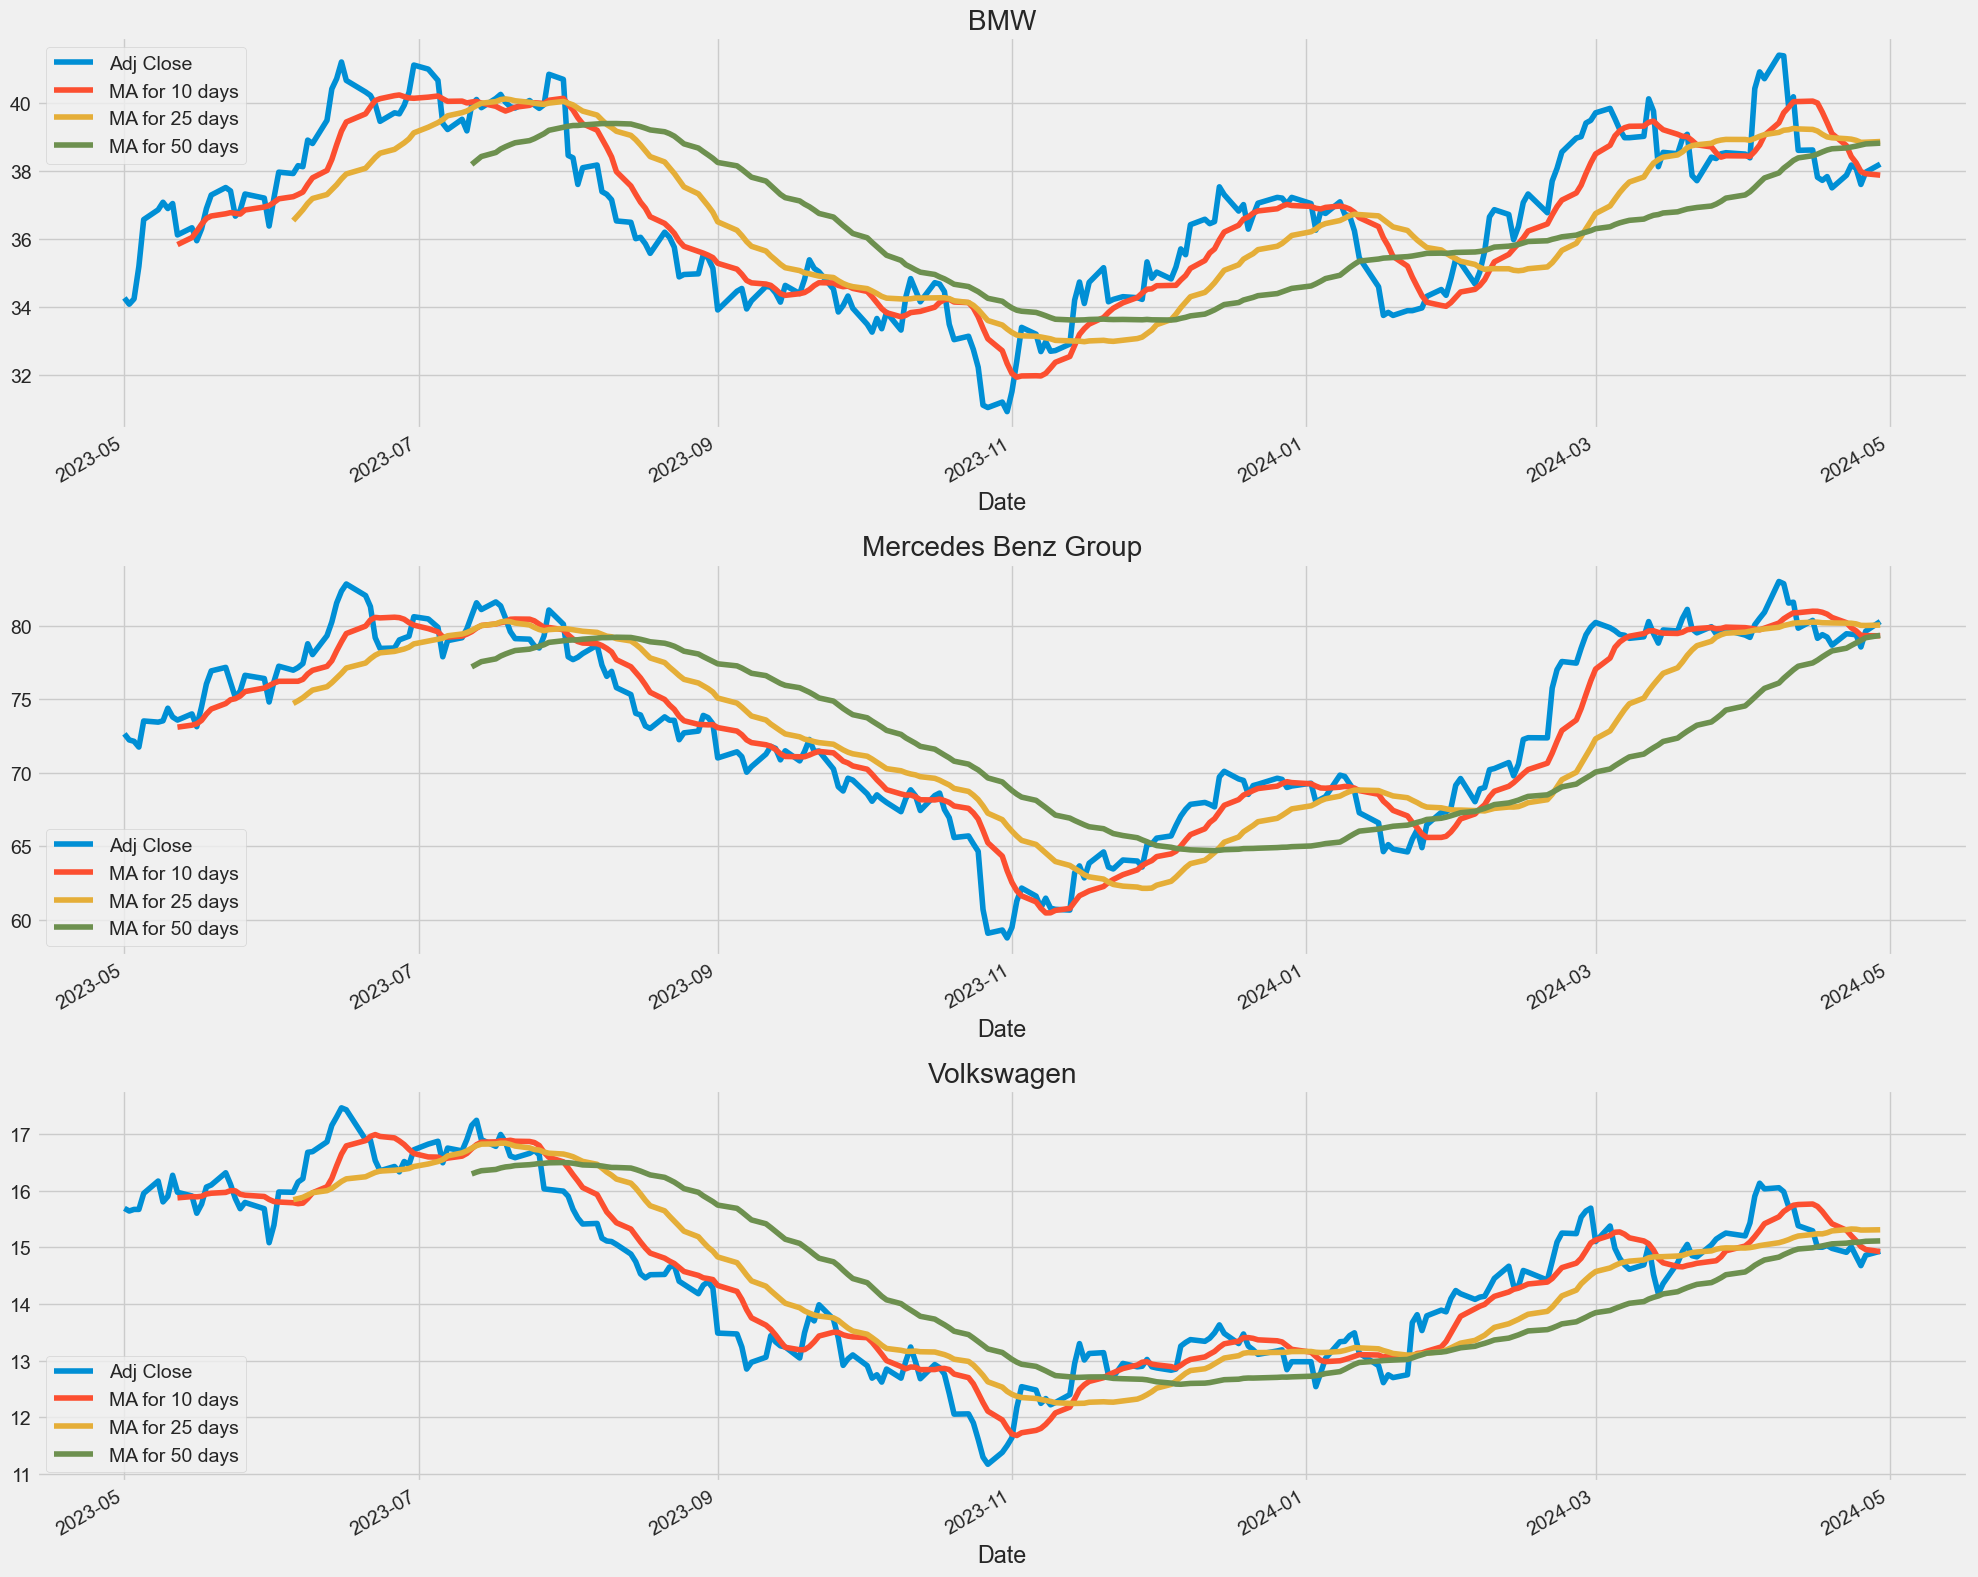

In [10]:
ma_day = [10, 25, 50]
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(16)
fig.set_figwidth(20)

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
counter = 0
counter1 = 0
for i in range(len(company_list)):
    company_list[i][['Adj Close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[counter])
    axes[counter].set_title(company_name[i])
    counter += 1

fig.tight_layout()

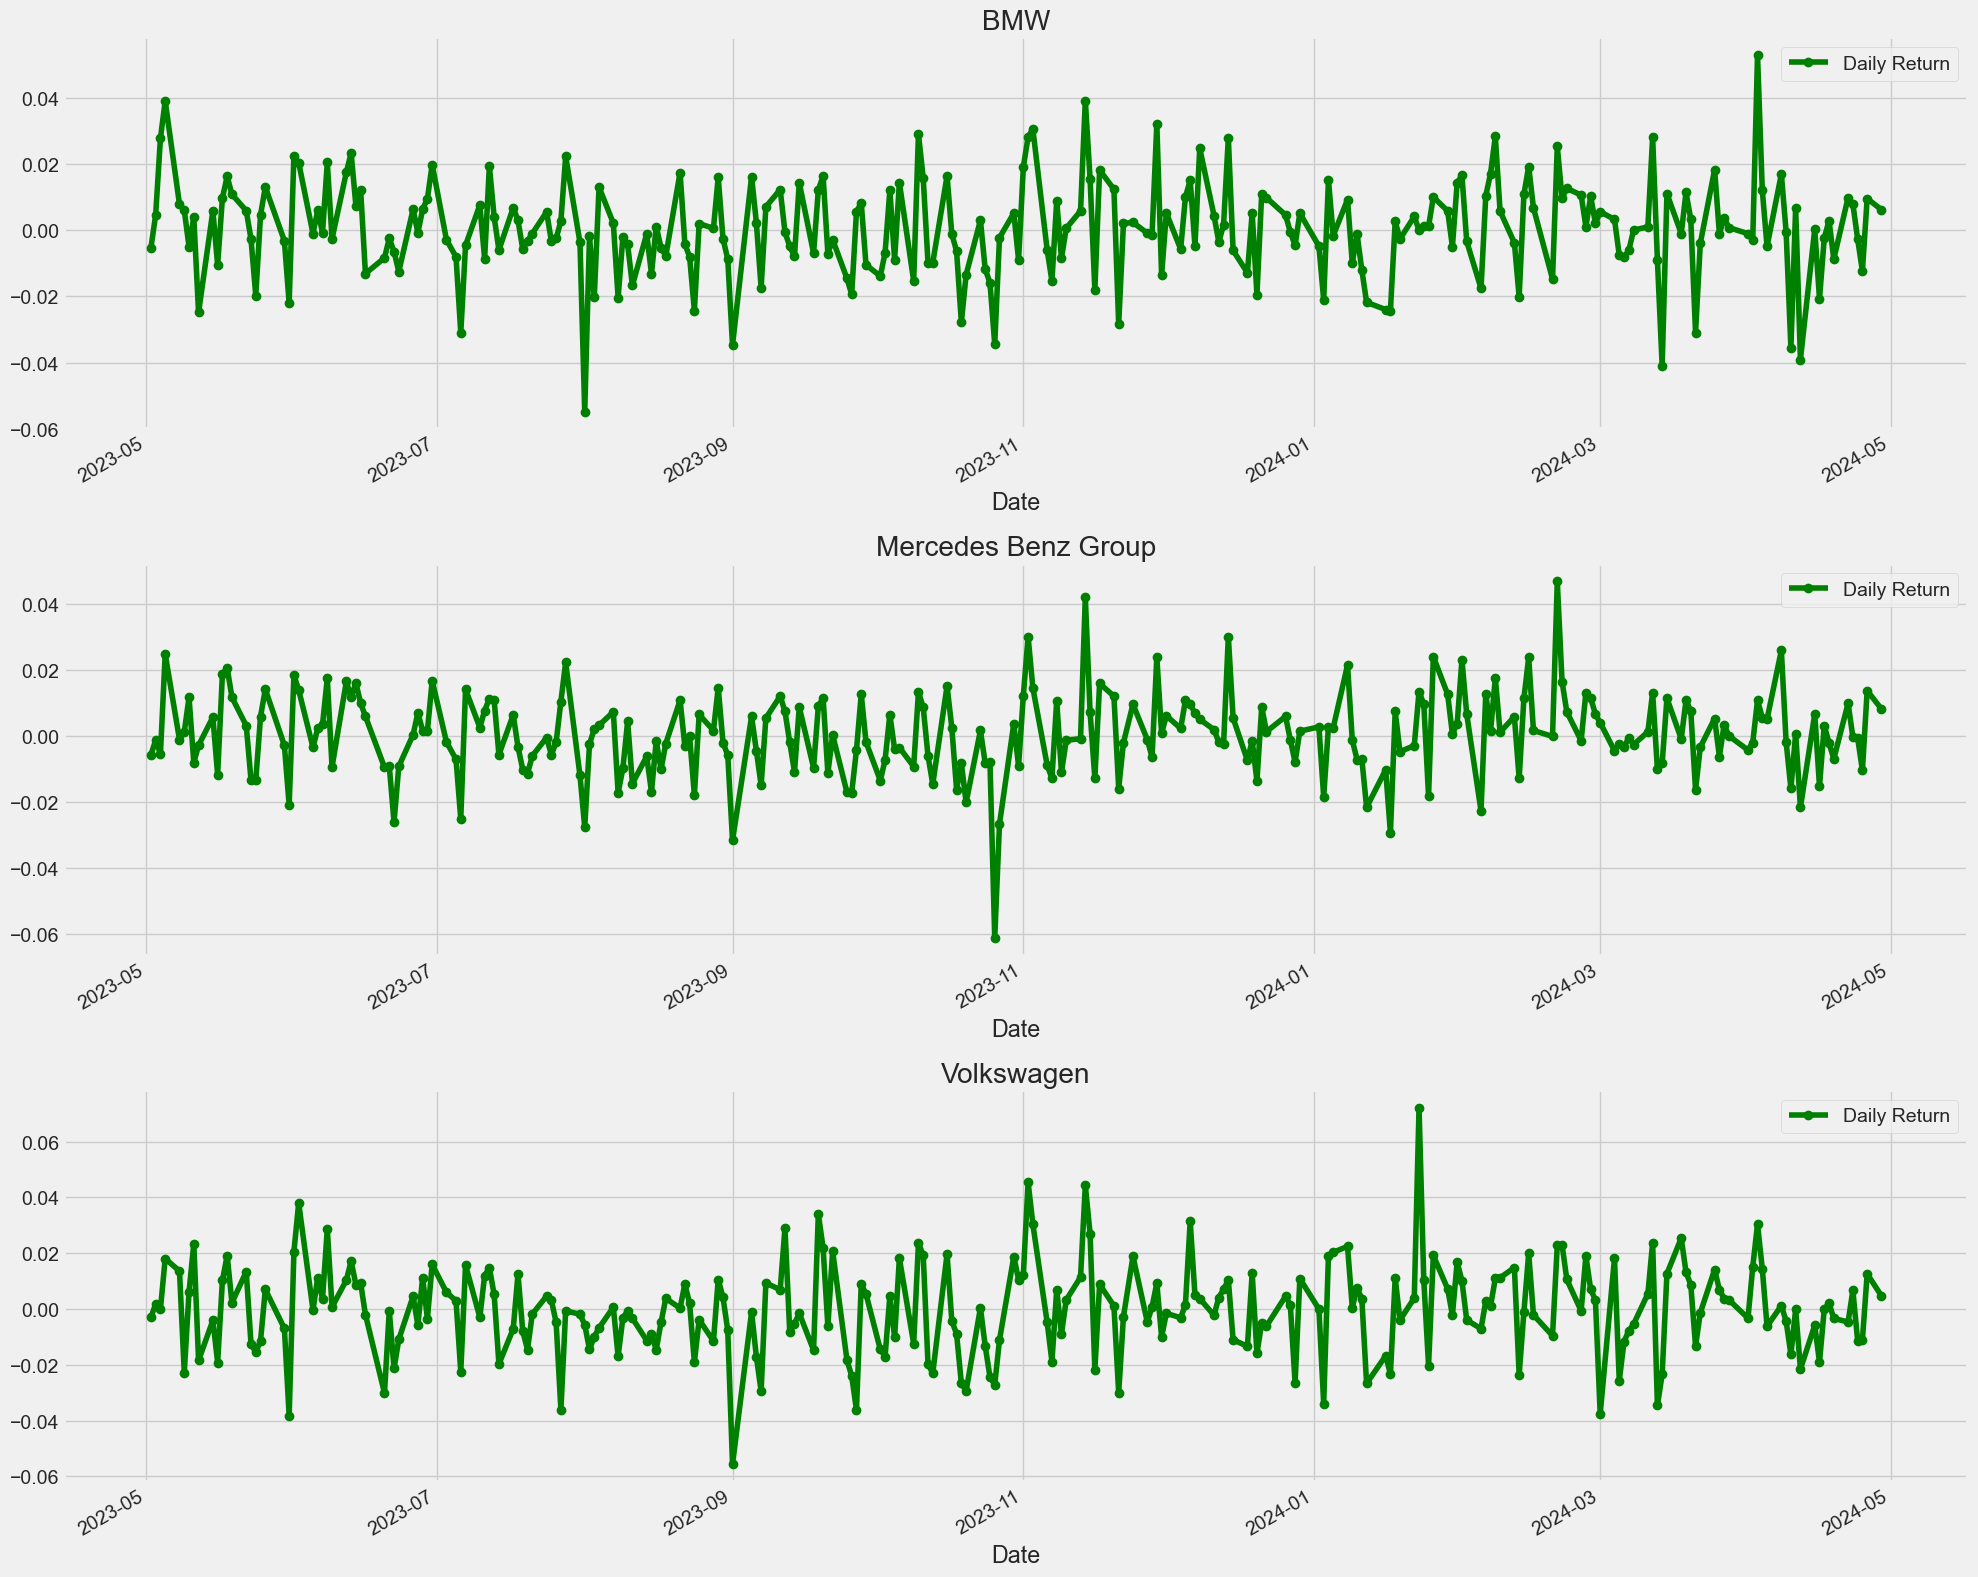

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(16)
fig.set_figwidth(20)

""" In this step I calculate the daily percent change on 'Adj Close' column with pct_change method. As a result,
we can see the changes in positive way or negative way. """
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
        
counter = 0
counter1 = 0
for i in range(len(company_list)):
    company_list[i][['Daily Return']].plot(ax=axes[counter], color = 'green',legend = True, linestyle = '-', marker = 'o')
    axes[counter].set_title(company_name[i])
    counter += 1

fig.tight_layout()

In [12]:
"""
The visualization shows us, some of the increament or decreament on stocks. 
For example there is an outlier value in Mercedes Benz Datas. Lets dive into this.
"""
MBGAF[MBGAF['Daily Return'] < -0.05]

,Open,High,Low,Close,Adj Close,Volume,Name_Of_Company,MA for 10 days,MA for 25 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2023-10-26,60.869999,61.150002,60.189999,60.689999,60.689999,140000,Mercedes Benz Group,66.073,67.744,69.9336,-0.061253


* As I checked the internet, Mercedes-Benz Group announced in a statement on October 26, 2023 that the company 
made a profit before interest and tax of 4.8 Billion Euros in the 3rd quarter of 2023 on electric vehicles. 
This value was 8% less than 5.2 Billion Euros in the 3rd quarter of 2022.

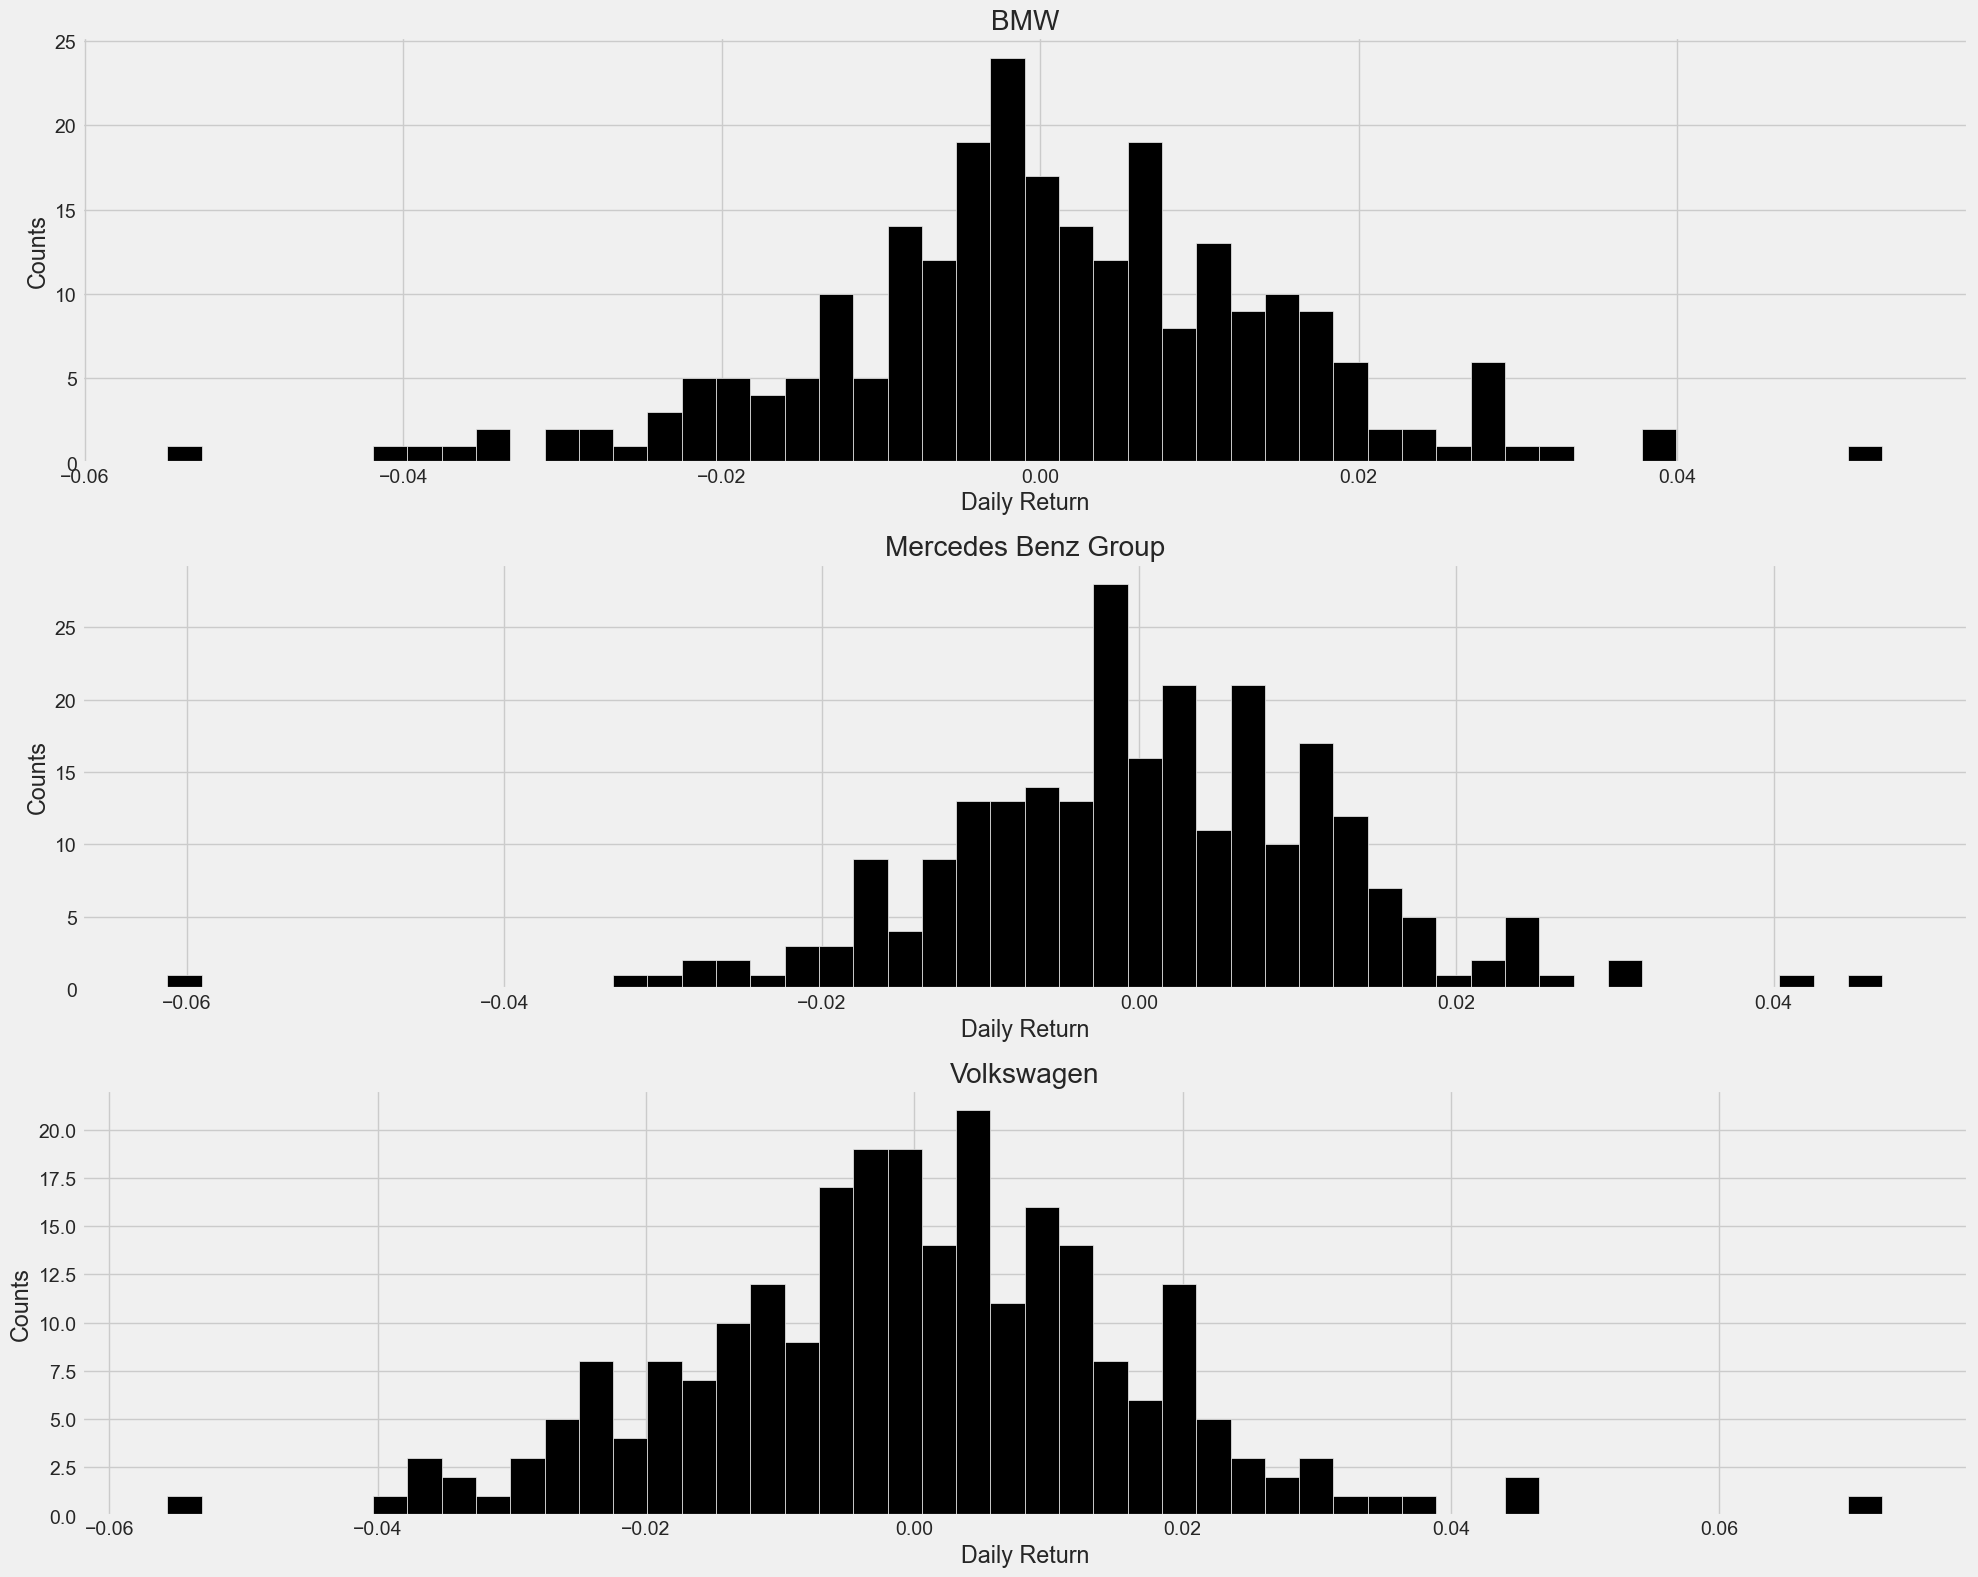

In [13]:
plt.figure(figsize=(20, 16))
# Now on, let me visualize the histogram plot results, in order to understand Daily Return columns.
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 1, i)
    company['Daily Return'].hist(bins=50, color = 'black')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [14]:
# Let me have all the closing prices for the car price stock list into one DataFrame
adj_closing_df = pdr.get_data_yahoo(auto_list, start=start, end=end)['Adj Close']

# Make a new auto adj close returns DataFrame
auto_returns = adj_closing_df.pct_change()
auto_returns.tail(10)

[*********************100%%**********************]  3 of 3 completed


Ticker,BMWYY,MBGAF,VWAGY
Date,,,
2024-04-16,-0.020720,-0.015178,-0.018967
2024-04-17,-0.002380,0.003158,0.000000
2024-04-18,0.002916,-0.002141,0.002000
2024-04-19,-0.008723,-0.006941,-0.003327
2024-04-22,0.009867,0.009912,-0.004673
2024-04-23,0.007922,-0.000377,0.006707
2024-04-24,-0.002620,-0.000504,-0.011326
2024-04-25,-0.012346,-0.010453,-0.011119
2024-04-26,0.009574,0.013746,0.012606


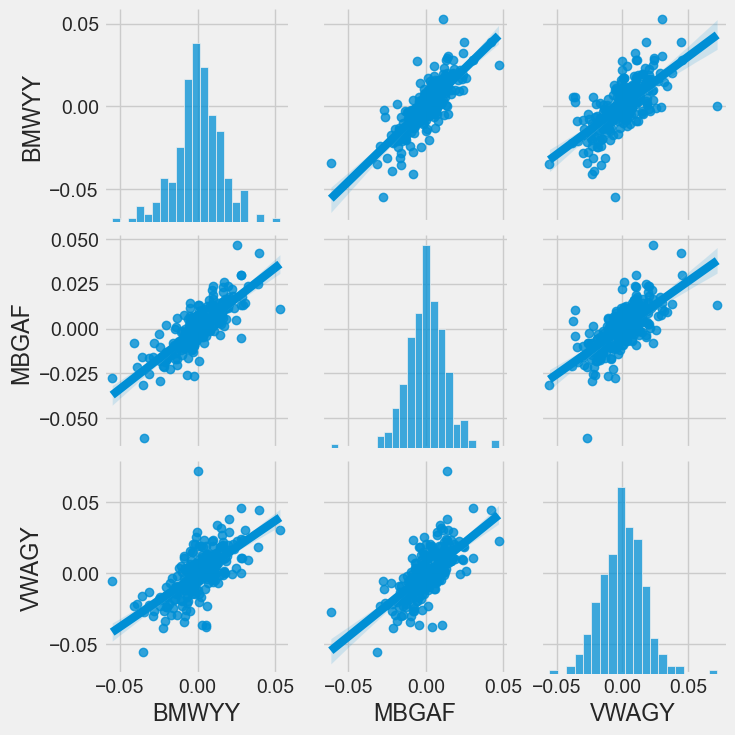

In [15]:
# To plot multiple pairwise bivariate distributions in a dataset, we can use the .pairplot() function. 
# This visualization tool shows us the relation between the companies stocks.
sns.pairplot(auto_returns, kind='reg')

* Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between BMW and Mercedes daily returns. It might be interesting to investigate that individual comparison.

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

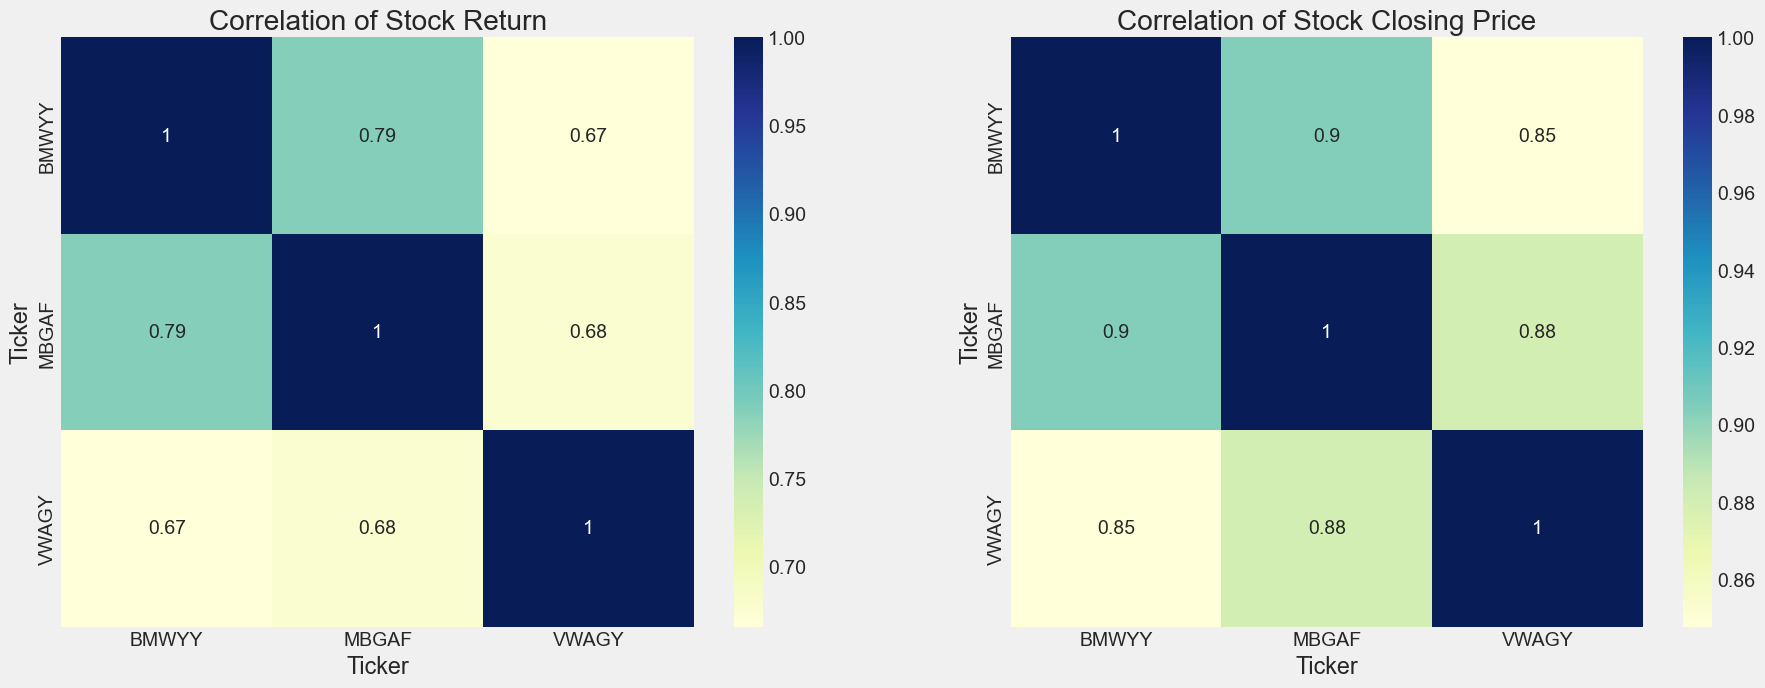

In [16]:
"""
Perfect, right now we can also implement a correlation plot, to get actual numerical values for the correlation 
between the stocks daily return values.
"""
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sns.heatmap(auto_returns.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of Stock Return')

plt.subplot(2, 2, 2)
sns.heatmap(adj_closing_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation of Stock Closing Price')

By comparing the closing prices, we see an interesting relationship between BMW and Mercedes(0.9 correlation score).

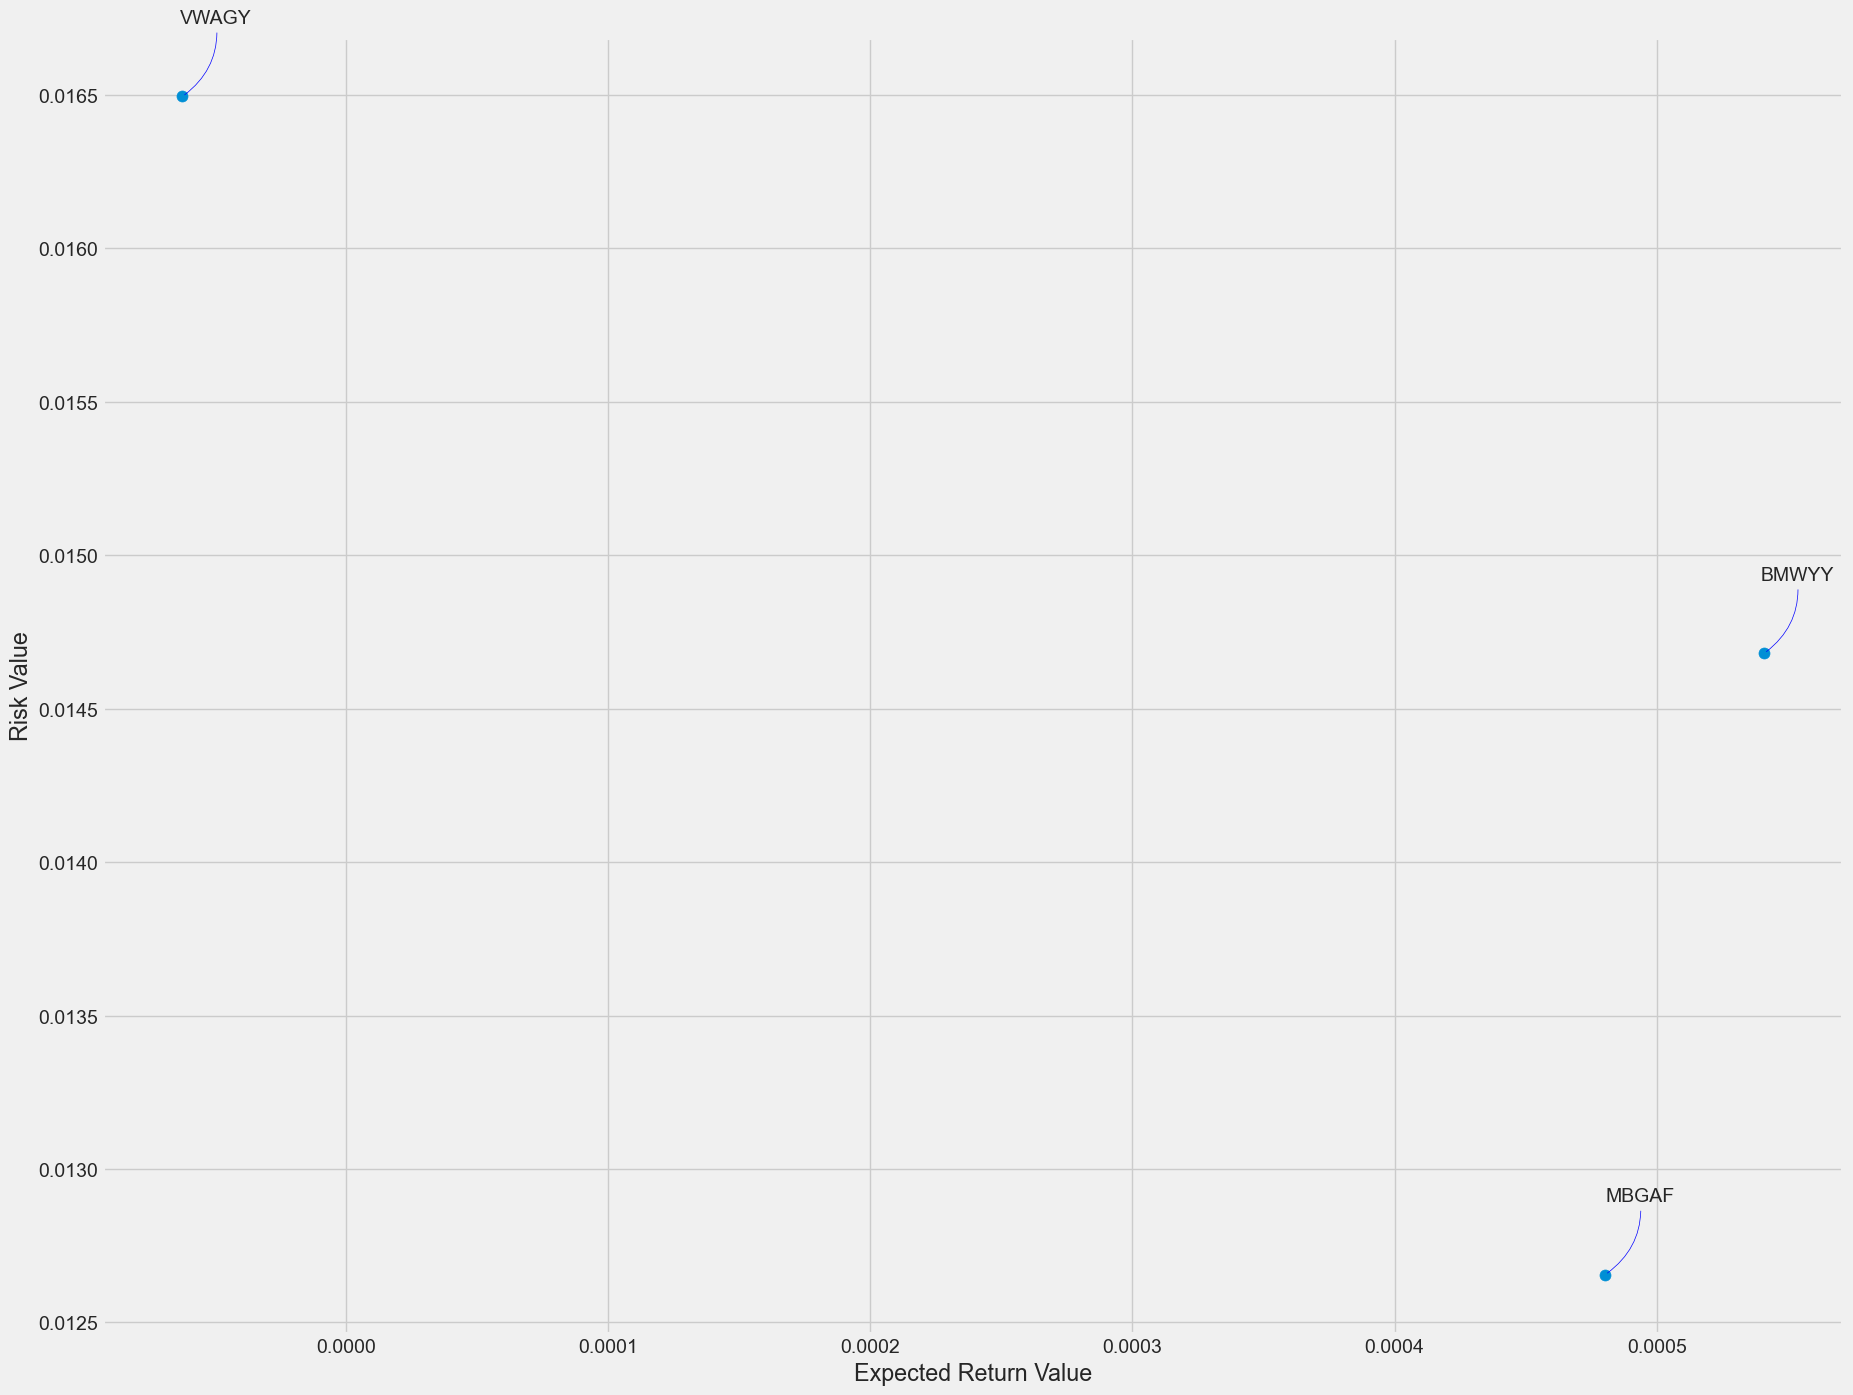

In [17]:
"""
Last but not least, we can calculate the risk of the stock market price. We can use the information on daily percentage
returns is by comparing the expected return with the standard deviation of the daily returns.
"""
returns = auto_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(20, 16))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected Return Value')
plt.ylabel('Risk Value')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# I. Let's Predict BMW Stock Market Price

In [18]:
# Get the last 10 years stock datas
df_bmw = pdr.get_data_yahoo('BMWYY', start=datetime(end.year - 10, end.month, end.day), end=datetime.now())
df_bmw

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-29,41.560001,41.759998,41.470001,41.630001,26.193789,35100
2014-04-30,41.590000,41.730000,41.430000,41.730000,26.256708,19400
2014-05-01,41.590000,41.720001,41.529999,41.540001,26.137157,28100
2014-05-02,41.119999,41.310001,40.990002,41.040001,25.822557,26900
2014-05-05,40.490002,41.119999,40.410000,41.119999,25.872892,24900
...,...,...,...,...,...,...
2024-04-23,37.740002,38.169998,37.720001,38.169998,38.169998,33200
2024-04-24,37.810001,38.090000,37.709999,38.070000,38.070000,24200
2024-04-25,37.400002,37.700001,37.250000,37.599998,37.599998,60200


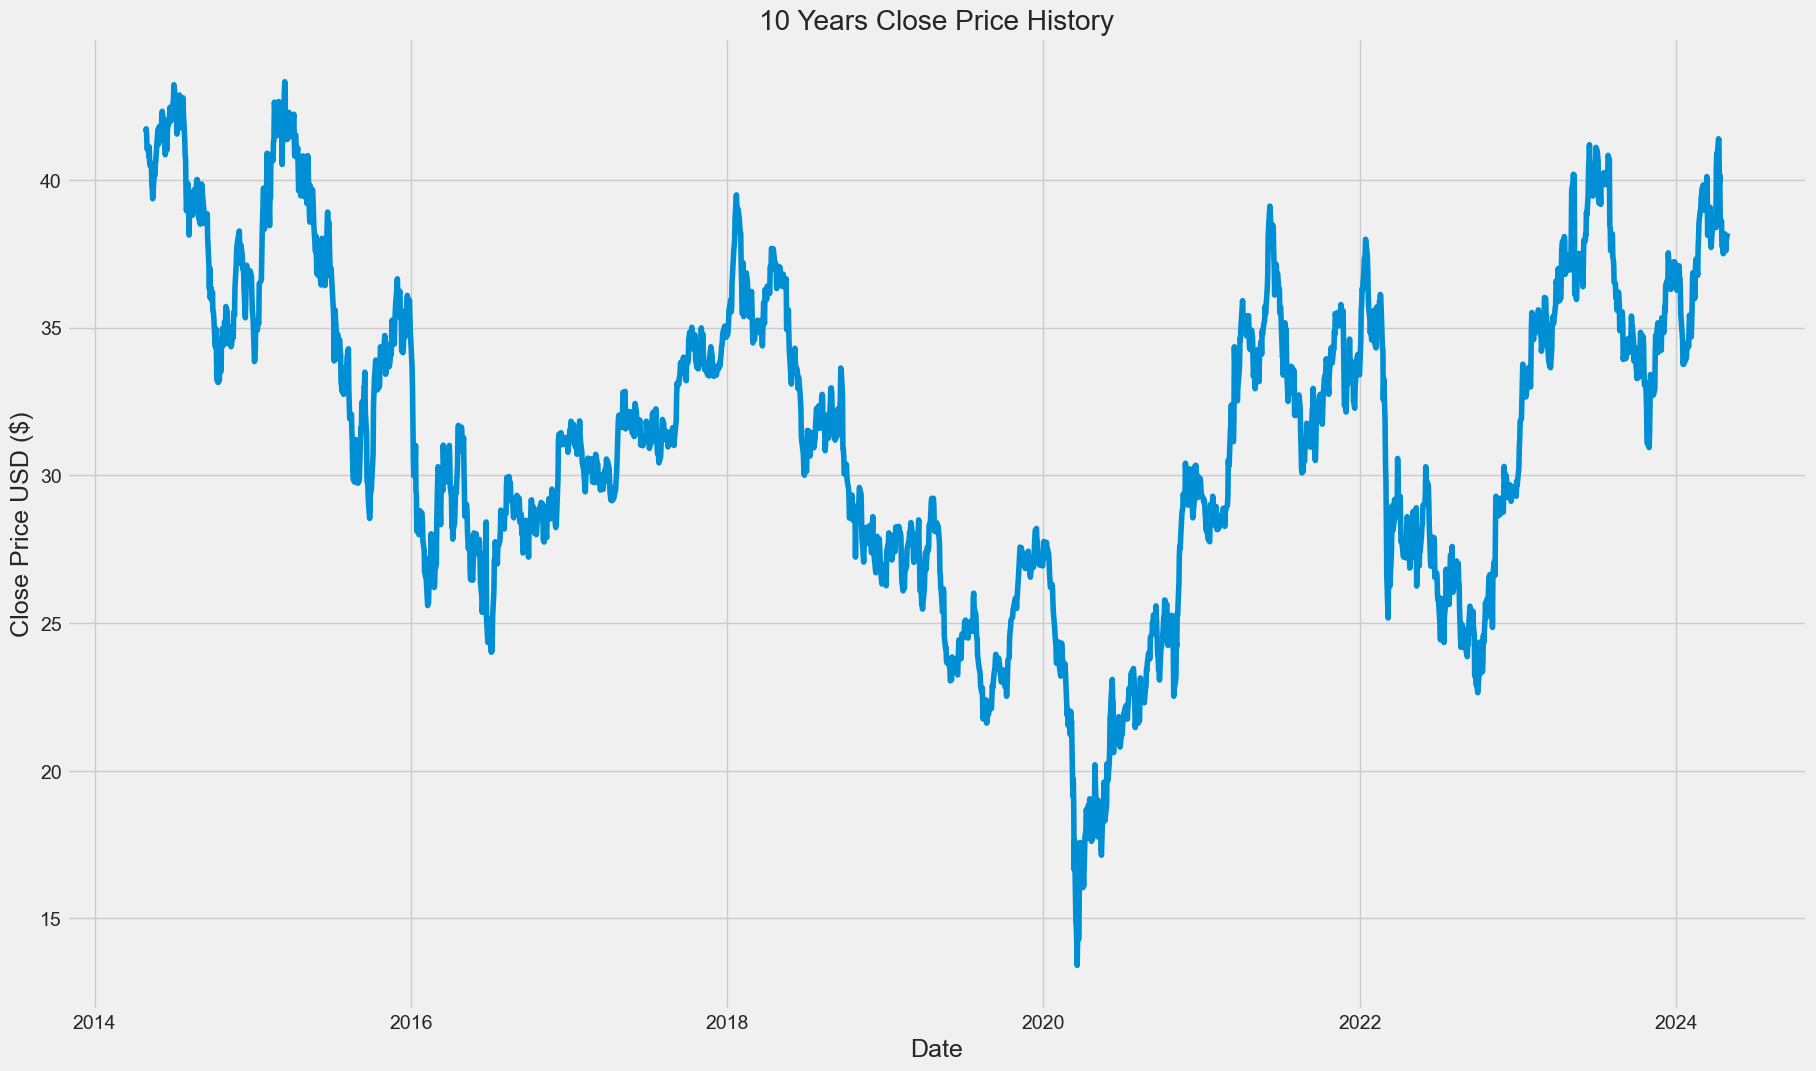

In [19]:
# In this prediction, I will work on Close price, so let's visualize the Close Price daily changes.
plt.figure(figsize=(20,12))
plt.title('10 Years Close Price History')
plt.plot(df_bmw['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

"""
Step 1: Create a new dataframe with only the Close column
Step 2: Convert the data_bmw to a numpy array with values method.
Step 3: Get the 95% of datas as training data
Step 4: Scaled all data between 0 and 1
"""
data_bmw = df_bmw.filter(['Close'])
dataset_bmw = data_bmw.values
training_data_len_bmw = int(np.ceil(len(dataset_bmw) * .95))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_bmw = scaler.fit_transform(dataset_bmw)

scaled_data_bmw[:10]

array([[0.9434972 ],
       [0.94684052],
       [0.94048817],
       [0.92377135],
       [0.92644598],
       [0.91541295],
       [0.92644598],
       [0.90839191],
       [0.90504847],
       [0.90772323]])

In [21]:
# Create the scaled training data set
train_data_bmw = scaled_data_bmw[0:int(training_data_len_bmw), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_bmw)):
    x_train.append(train_data_bmw[i-60:i, 0])
    y_train.append(train_data_bmw[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.9434972 , 0.94684052, 0.94048817, 0.92377135, 0.92644598,
       0.91541295, 0.92644598, 0.90839191, 0.90504847, 0.90772323,
       0.88498834, 0.87830159, 0.86760284, 0.87428959, 0.90103647,
       0.89401544, 0.90538288, 0.90939488, 0.91741888, 0.94550314,
       0.92912073, 0.9475092 , 0.94918086, 0.93747914, 0.9475092 ,
       0.93380142, 0.96221996, 0.96656637, 0.95352727, 0.9391508 ,
       0.93279845, 0.92577729, 0.91741888, 0.92811764, 0.92276826,
       0.94483445, 0.95687058, 0.95085252, 0.96088271, 0.97124705,
       0.96857243, 0.95553333, 0.95820796, 0.96589768, 0.97592774,
       0.98027415, 0.99665669, 0.97860249, 0.95820796, 0.95954533,
       0.94082245, 0.94817789, 0.95954533, 0.95218989, 0.98495484,
       0.96355733, 0.96756933, 0.9475092 , 0.96088271, 0.96924112])]
[0.9819458068110265]

[array([0.9434972 , 0.94684052, 0.94048817, 0.92377135, 0.92644598,
       0.91541295, 0.92644598, 0.90839191, 0.90504847, 0.90772323,
       0.88498834, 0.87830159, 0.867

# Long Short Term Memory(LSTM)

LSTM is a type of Recurrent Neural Network(RNN) architecture, designed to overcome the vanishing gradient problem and capture long-term dependencies in sequential data. It was introduced by Hochreiter & Schmidhuber in 1997.

LSTM has three types of gates that regulate the flow of information into and out of the memory cell:
* Forget Gate: Determines what information to discard from the cell state.
* Input Gate: Decides what new information to store in the cell state.
* Output Gate: Determines what information to output from the cell state.

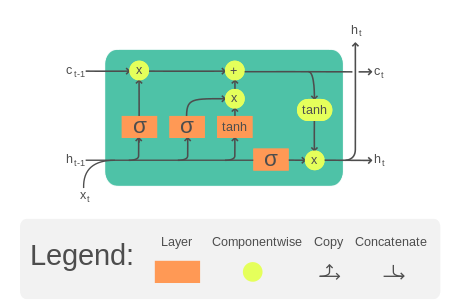

In our algorithm, I will define algorithm step by step;
* 1. Model Creation:
Sequential(): Initializes a Keras Sequential model, which allows adding layers sequentially.
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1))): Adds the first LSTM layer to the model. This layer has 128 neurons, return_sequences parameter is set to True because there are consecutive LSTM layers, and the input shape is specified as (x_train.shape[1], 1).
model.add(LSTM(64, return_sequences=False)): Adds a second LSTM layer to the model. This layer has 64 neurons, and return_sequences parameter is set to False because a Dense layer follows this layer.
model.add(Dense(25)): Adds a Dense layer with 25 neurons.
model.add(Dense(1)): Adds the output layer as a Dense layer with a single neuron to produce the predicted output.
* 2. Model Compilation:
model.compile(optimizer='adam', loss='mean_squared_error'): Compiles the model. It uses the 'adam' optimizer and selects mean squared error as the loss function.
* 3. Model Training:
model.fit(x_train, y_train, batch_size=1, epochs=1): Trains the model on the x_train and y_train datasets. The batch size is set to 1, and training is performed for one epoch (passing through the entire dataset once).

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Model Creation
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 0.0048


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data_bmw = scaled_data_bmw[training_data_len_bmw - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_bmw[training_data_len_bmw:, :]
for i in range(60, len(test_data_bmw)):
    x_test.append(test_data_bmw[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions_bmw = model.predict(x_test)
predictions_bmw = scaler.inverse_transform(predictions_bmw)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_bmw - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


0.6800513705117421

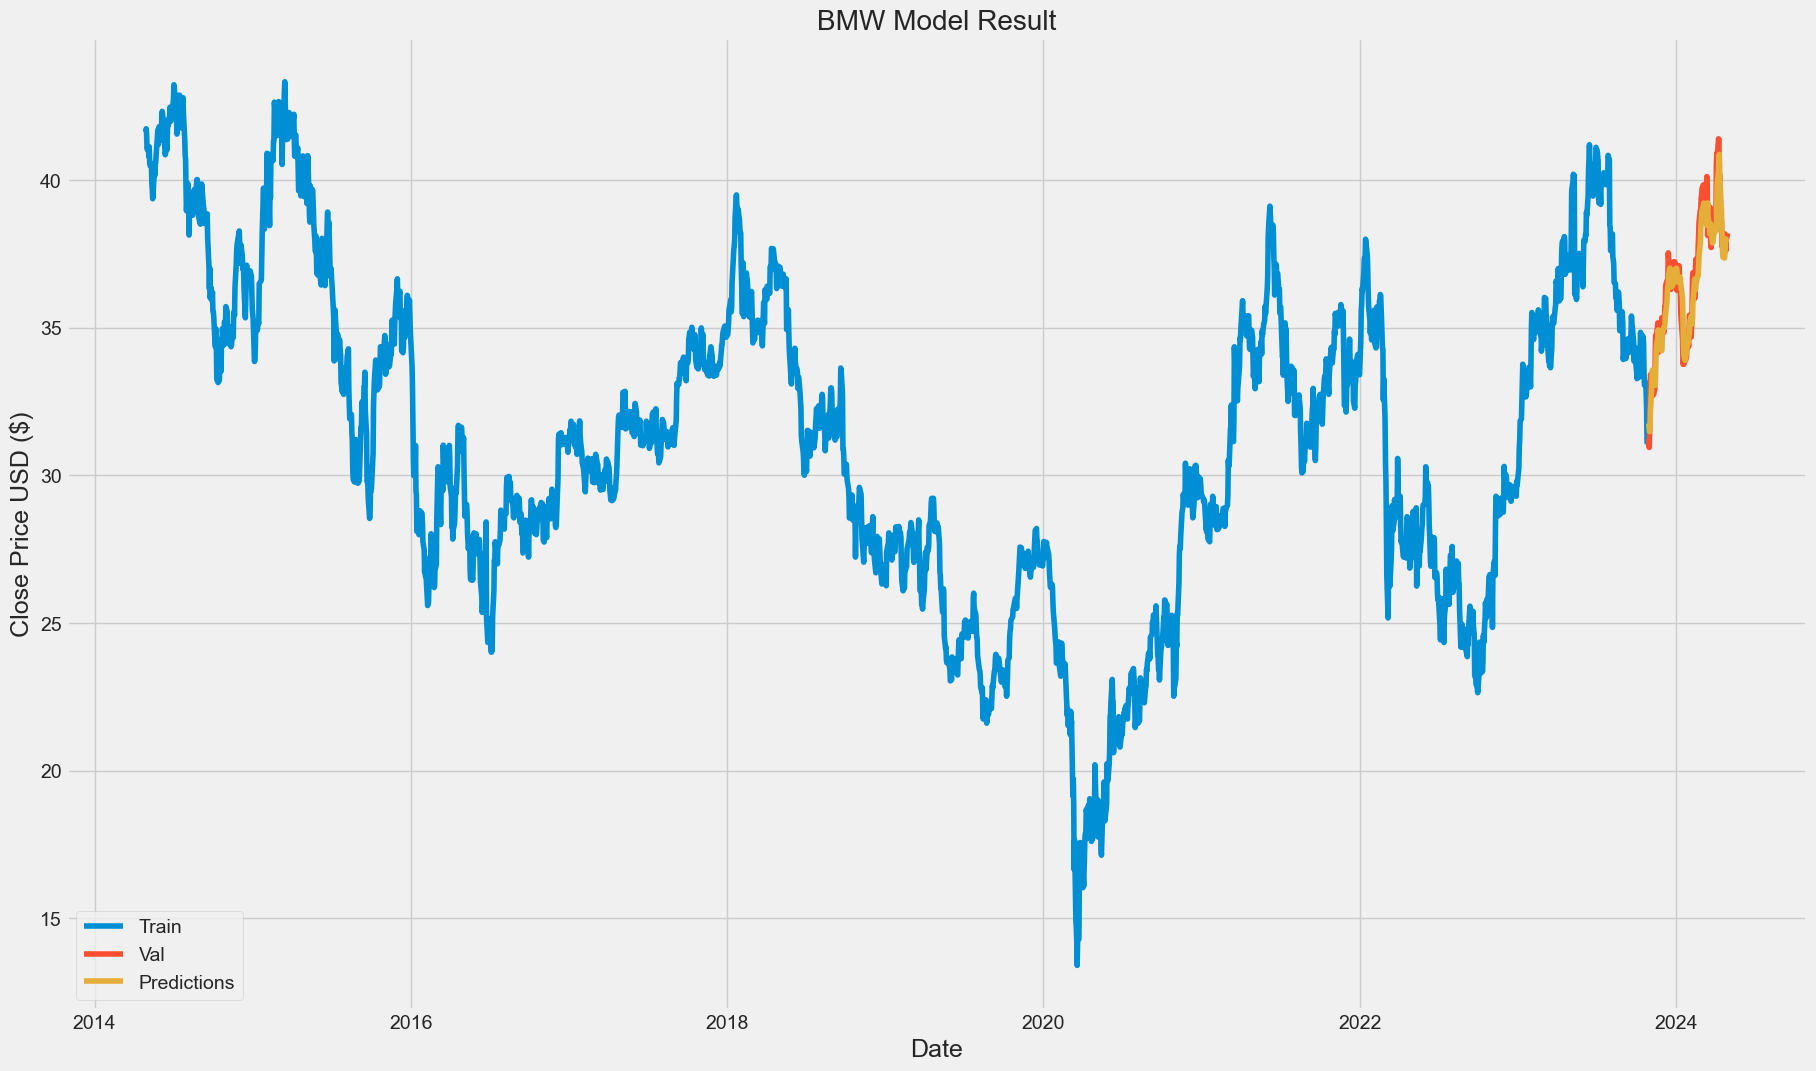

In [24]:
train = data_bmw[:training_data_len_bmw]
valid = data_bmw[training_data_len_bmw:]
valid['Predictions'] = predictions_bmw
# Visualize the data
plt.figure(figsize=(20,12))
plt.title('BMW Model Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [25]:
# Show the valid and predicted prices
valid[-20:]

,Close,Predictions
Date,,
2024-04-02,38.380001,38.330647
2024-04-03,40.410000,38.289558
2024-04-04,40.900002,39.012669
2024-04-05,40.700001,39.848473
2024-04-08,41.389999,40.295551
2024-04-09,41.369999,40.693863
2024-04-10,39.900002,40.862705
2024-04-11,40.169998,40.282608
2024-04-12,38.599998,39.810421


# II. Let's Predict Mercedes Stock Market Price

In [26]:
# Get the last 10 years stock datas
df_mrcds = pdr.get_data_yahoo('MBGAF', start=datetime(end.year - 10, end.month, end.day), end=datetime.now())
df_mrcds

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-29,93.440002,94.050003,93.440002,93.760002,60.129688,21300
2014-04-30,92.199997,92.760002,92.199997,92.760002,59.488361,29900
2014-05-01,92.440002,92.949997,92.440002,92.690002,59.443481,16800
2014-05-02,92.089996,92.769997,91.660004,91.940002,58.962486,19400
2014-05-05,90.669998,91.680000,90.199997,91.459999,58.654667,17500
...,...,...,...,...,...,...
2024-04-23,78.959999,79.470001,78.459999,79.440002,79.440002,12500
2024-04-24,79.269997,79.440002,78.860001,79.400002,79.400002,32800
2024-04-25,77.949997,78.779999,77.489998,78.570000,78.570000,26600


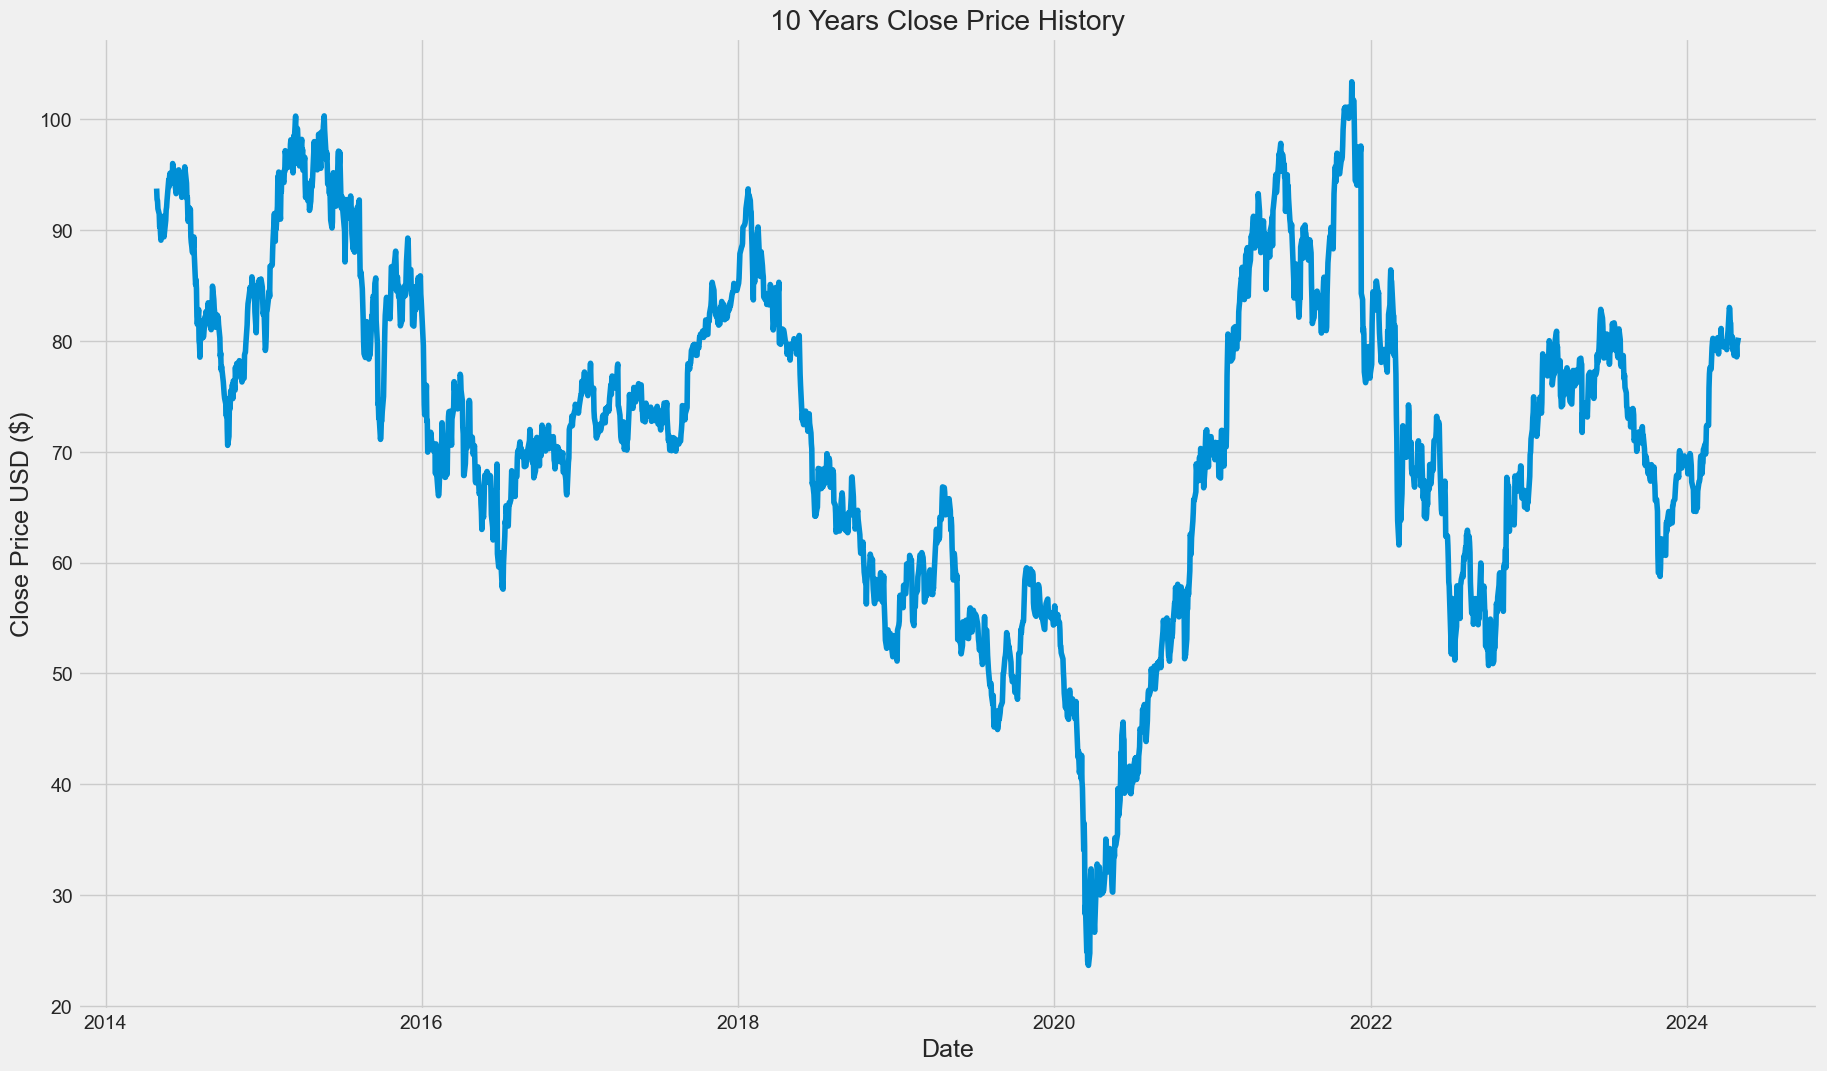

In [27]:
# In this prediction, I will work on Close price, so let's visualize the Close Price daily changes.
plt.figure(figsize=(20,12))
plt.title('10 Years Close Price History')
plt.plot(df_mrcds['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

"""
Step 1: Create a new dataframe with only the Close column
Step 2: Convert the data_bmw to a numpy array with values method.
Step 3: Get the 95% of datas as training data
Step 4: Scaled all data between 0 and 1
"""
data_mrcds = df_mrcds.filter(['Close'])
dataset_mrcds = data_mrcds.values
training_data_len_mrcds = int(np.ceil(len(dataset_mrcds) * .95))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_mrcds = scaler.fit_transform(dataset_mrcds)

scaled_data_mrcds[:10]

array([[0.87913742],
       [0.86659981],
       [0.86572218],
       [0.85631897],
       [0.85030088],
       [0.8357573 ],
       [0.83951852],
       [0.82785854],
       [0.8207121 ],
       [0.83375123]])

In [29]:
# Create the scaled training data set
train_data_mrcds = scaled_data_mrcds[0:int(training_data_len_mrcds), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_mrcds)):
    x_train.append(train_data_mrcds[i-60:i, 0])
    y_train.append(train_data_mrcds[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.87913742, 0.86659981, 0.86572218, 0.85631897, 0.85030088,
       0.8357573 , 0.83951852, 0.82785854, 0.8207121 , 0.83375123,
       0.84428288, 0.84766799, 0.83989463, 0.82447342, 0.83914241,
       0.84315444, 0.85481442, 0.85794883, 0.86572218, 0.88929286,
       0.88126879, 0.89330489, 0.8965647 , 0.887663  , 0.89468404,
       0.88515542, 0.90747236, 0.90408725, 0.89430792, 0.89468404,
       0.88214642, 0.87788368, 0.87337013, 0.88126879, 0.88916746,
       0.89781844, 0.90032592, 0.89806915, 0.87688065, 0.87612833,
       0.8813942 , 0.8692327 , 0.87311933, 0.87424776, 0.89079741,
       0.89631389, 0.90371113, 0.88515542, 0.86785355, 0.8692327 ,
       0.84942325, 0.8419007 , 0.8571966 , 0.85330988, 0.85556665,
       0.82459883, 0.81833002, 0.80654464, 0.81970907, 0.81306415])]
[0.8243480220536942]

[array([0.87913742, 0.86659981, 0.86572218, 0.85631897, 0.85030088,
       0.8357573 , 0.83951852, 0.82785854, 0.8207121 , 0.83375123,
       0.84428288, 0.84766799, 0.839

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Model Creation
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - loss: 0.0074


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data_mrcds = scaled_data_mrcds[training_data_len_mrcds - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_mrcds[training_data_len_mrcds:, :]
for i in range(60, len(test_data_mrcds)):
    x_test.append(test_data_mrcds[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions_mrcds = model.predict(x_test)
predictions_mrcds = scaler.inverse_transform(predictions_mrcds)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_mrcds - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


2.1021813112342547

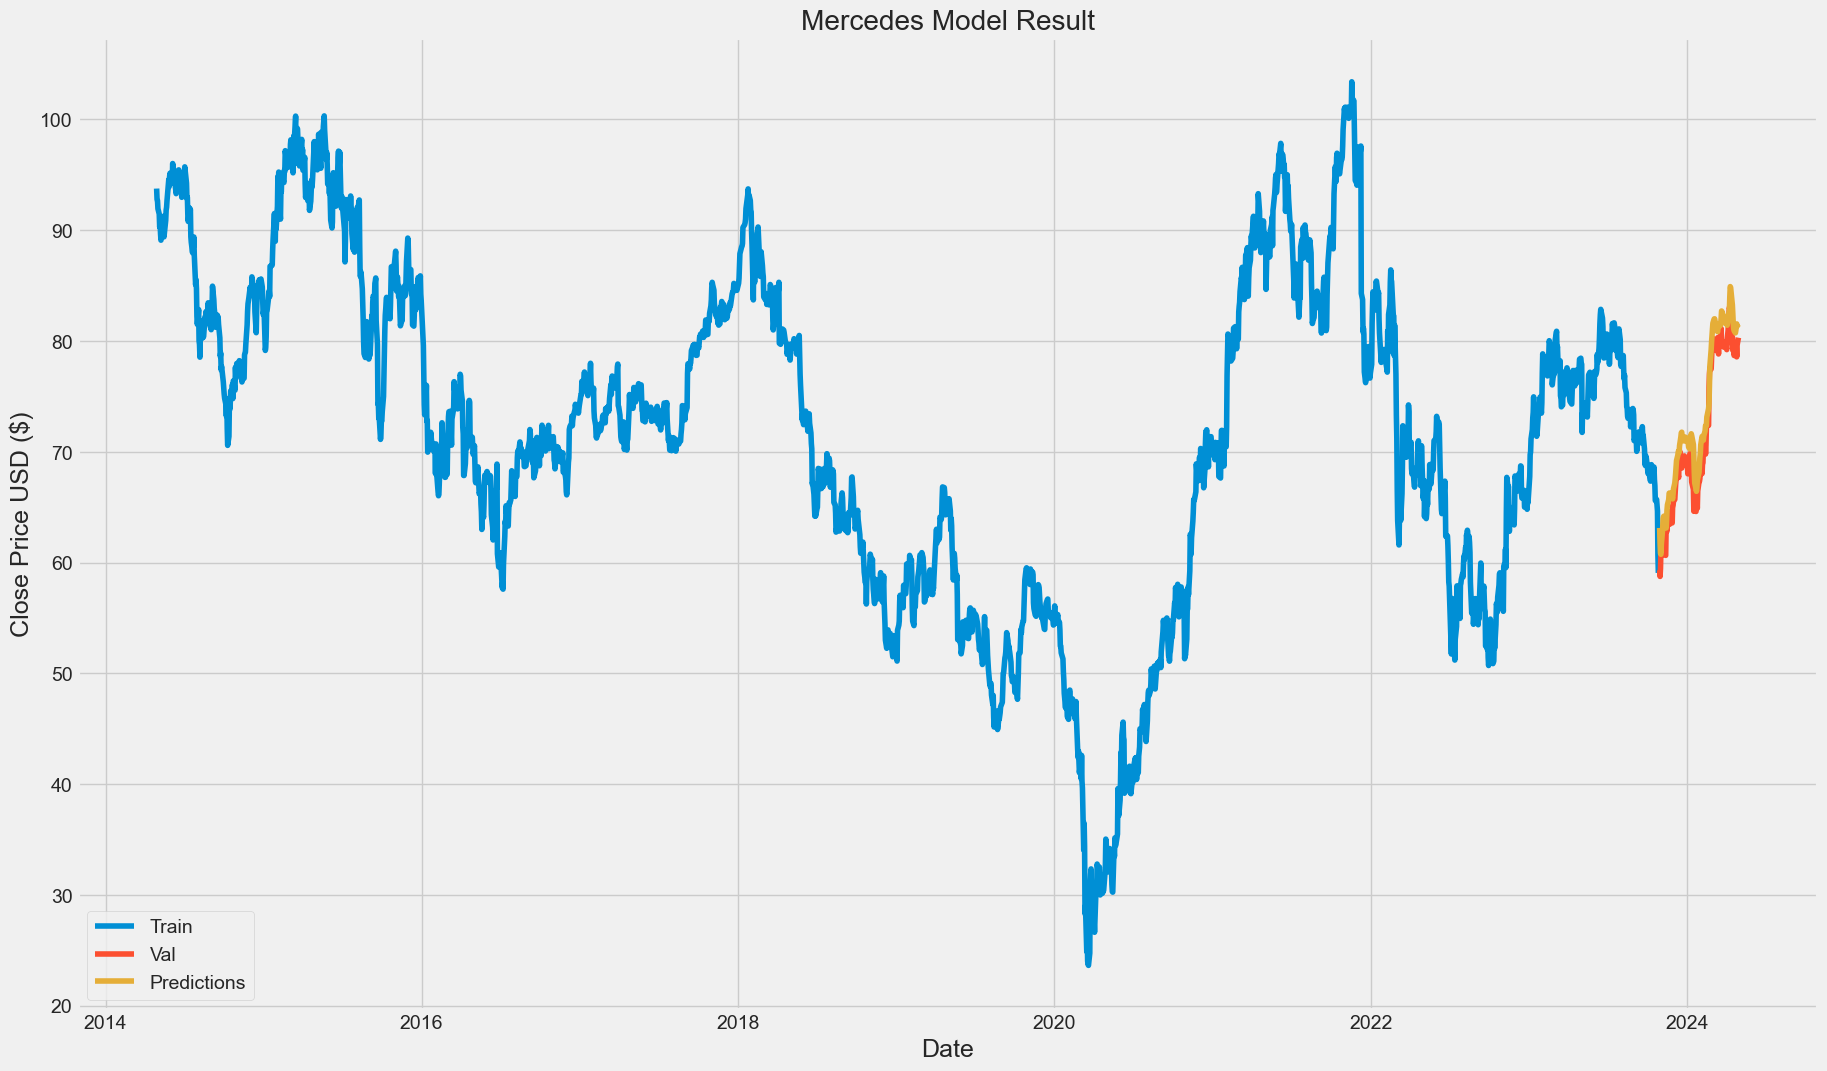

In [32]:
train = data_mrcds[:training_data_len_mrcds]
valid = data_mrcds[training_data_len_mrcds:]
valid['Predictions'] = predictions_mrcds
# Visualize the data
plt.figure(figsize=(20,12))
plt.title('Mercedes Model Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

# III. Let's Predict Volkswagen Stock Market Price

[*********************100%%**********************]  1 of 1 completed


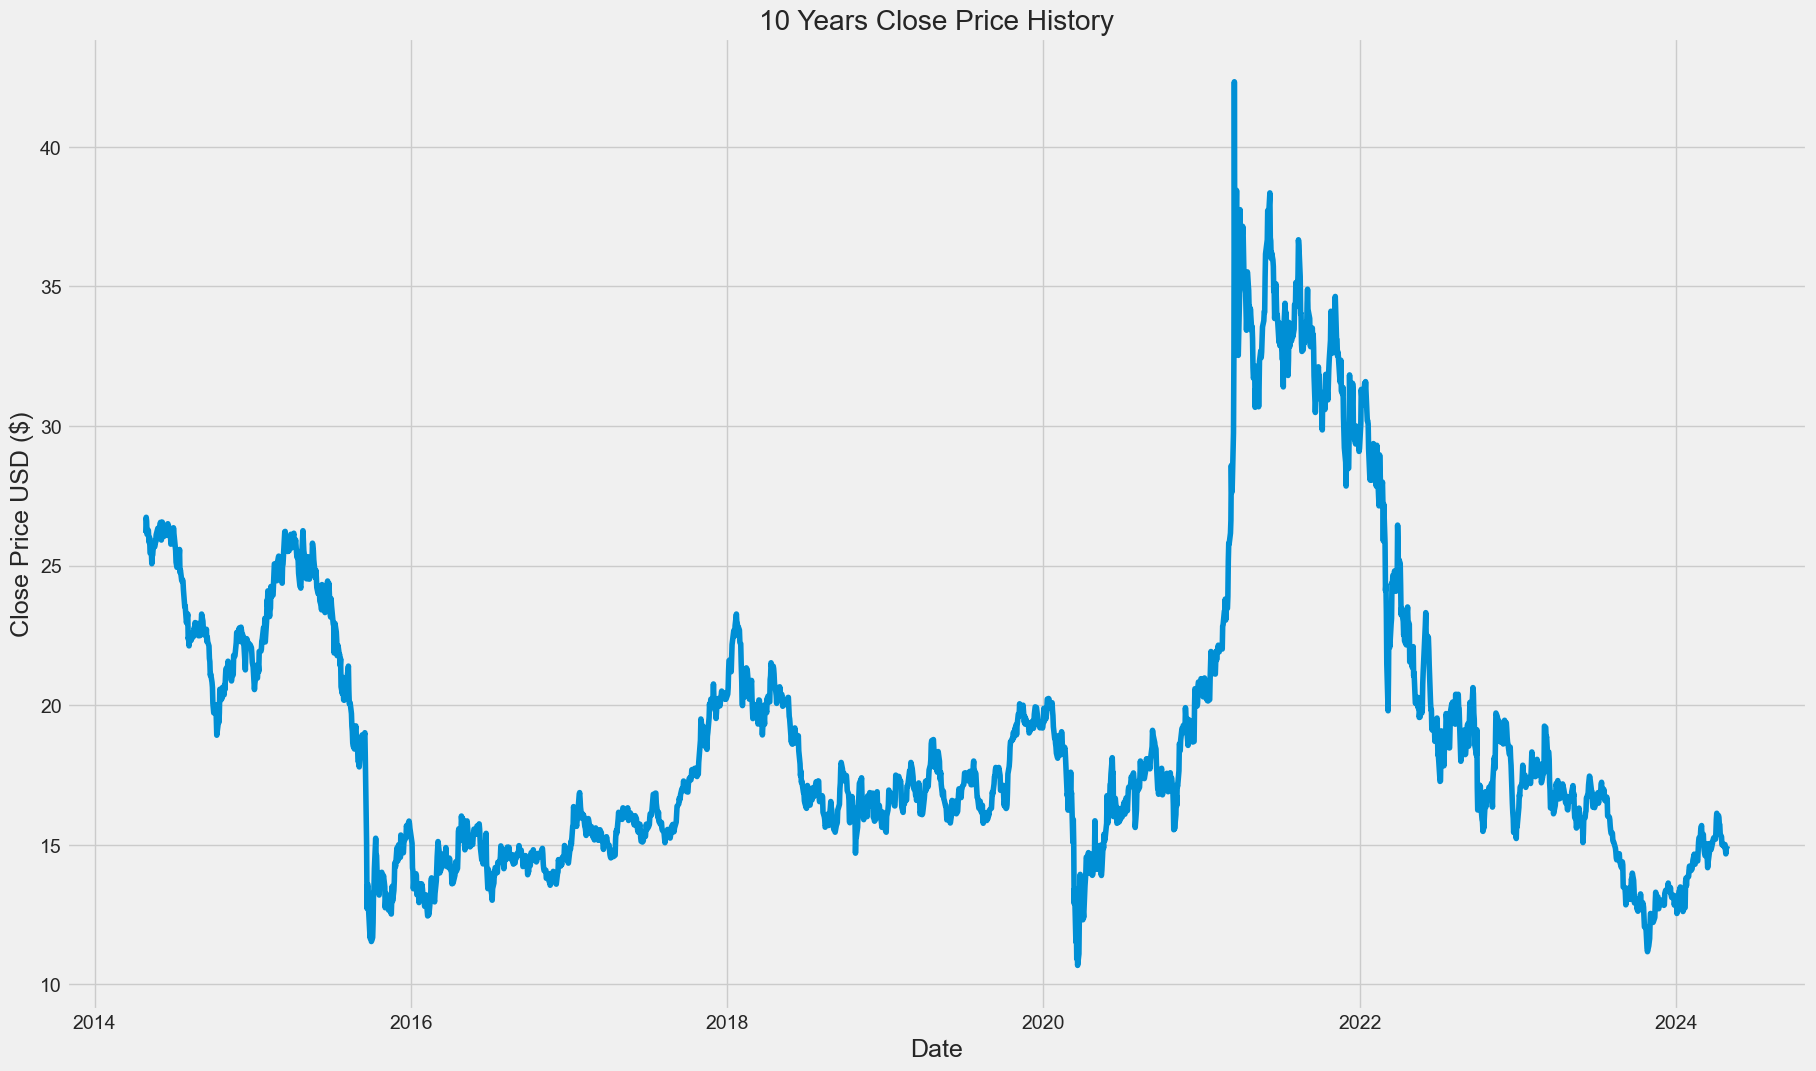

In [33]:
# Get the last 10 years stock datas
df_vw = pdr.get_data_yahoo('VWAGY', start=datetime(end.year - 10, end.month, end.day), end=datetime.now())

# In this prediction, I will work on Close price, so let's visualize the Close Price daily changes.
plt.figure(figsize=(20,12))
plt.title('10 Years Close Price History')
plt.plot(df_vw['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
from sklearn.preprocessing import MinMaxScaler

"""
Step 1: Create a new dataframe with only the Close column
Step 2: Convert the data_bmw to a numpy array with values method.
Step 3: Get the 95% of datas as training data
Step 4: Scaled all data between 0 and 1
"""
data_vw = df_vw.filter(['Close'])
dataset_vw = data_vw.values
training_data_len_vw = int(np.ceil(len(dataset_vw) * .95))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_vw = scaler.fit_transform(dataset_vw)

# Create the scaled training data set
train_data_vw = scaled_data_mrcds[0:int(training_data_len_vw), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_mrcds)):
    x_train.append(train_data_vw[i-60:i, 0])
    y_train.append(train_data_vw[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.87913742, 0.86659981, 0.86572218, 0.85631897, 0.85030088,
       0.8357573 , 0.83951852, 0.82785854, 0.8207121 , 0.83375123,
       0.84428288, 0.84766799, 0.83989463, 0.82447342, 0.83914241,
       0.84315444, 0.85481442, 0.85794883, 0.86572218, 0.88929286,
       0.88126879, 0.89330489, 0.8965647 , 0.887663  , 0.89468404,
       0.88515542, 0.90747236, 0.90408725, 0.89430792, 0.89468404,
       0.88214642, 0.87788368, 0.87337013, 0.88126879, 0.88916746,
       0.89781844, 0.90032592, 0.89806915, 0.87688065, 0.87612833,
       0.8813942 , 0.8692327 , 0.87311933, 0.87424776, 0.89079741,
       0.89631389, 0.90371113, 0.88515542, 0.86785355, 0.8692327 ,
       0.84942325, 0.8419007 , 0.8571966 , 0.85330988, 0.85556665,
       0.82459883, 0.81833002, 0.80654464, 0.81970907, 0.81306415])]
[0.8243480220536942]

[array([0.87913742, 0.86659981, 0.86572218, 0.85631897, 0.85030088,
       0.8357573 , 0.83951852, 0.82785854, 0.8207121 , 0.83375123,
       0.84428288, 0.84766799, 0.839

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Model Creation
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Model Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
model.fit(x_train, y_train, batch_size=1, epochs=1)

2333/2333 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.0042


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data_vw = scaled_data_vw[training_data_len_vw - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_vw[training_data_len_vw:, :]
for i in range(60, len(test_data_vw)):
    x_test.append(test_data_vw[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions_vw = model.predict(x_test)
predictions_vw = scaler.inverse_transform(predictions_vw)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_vw - y_test) ** 2)))
rmse

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DCD4125D00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


0.31096850991727204

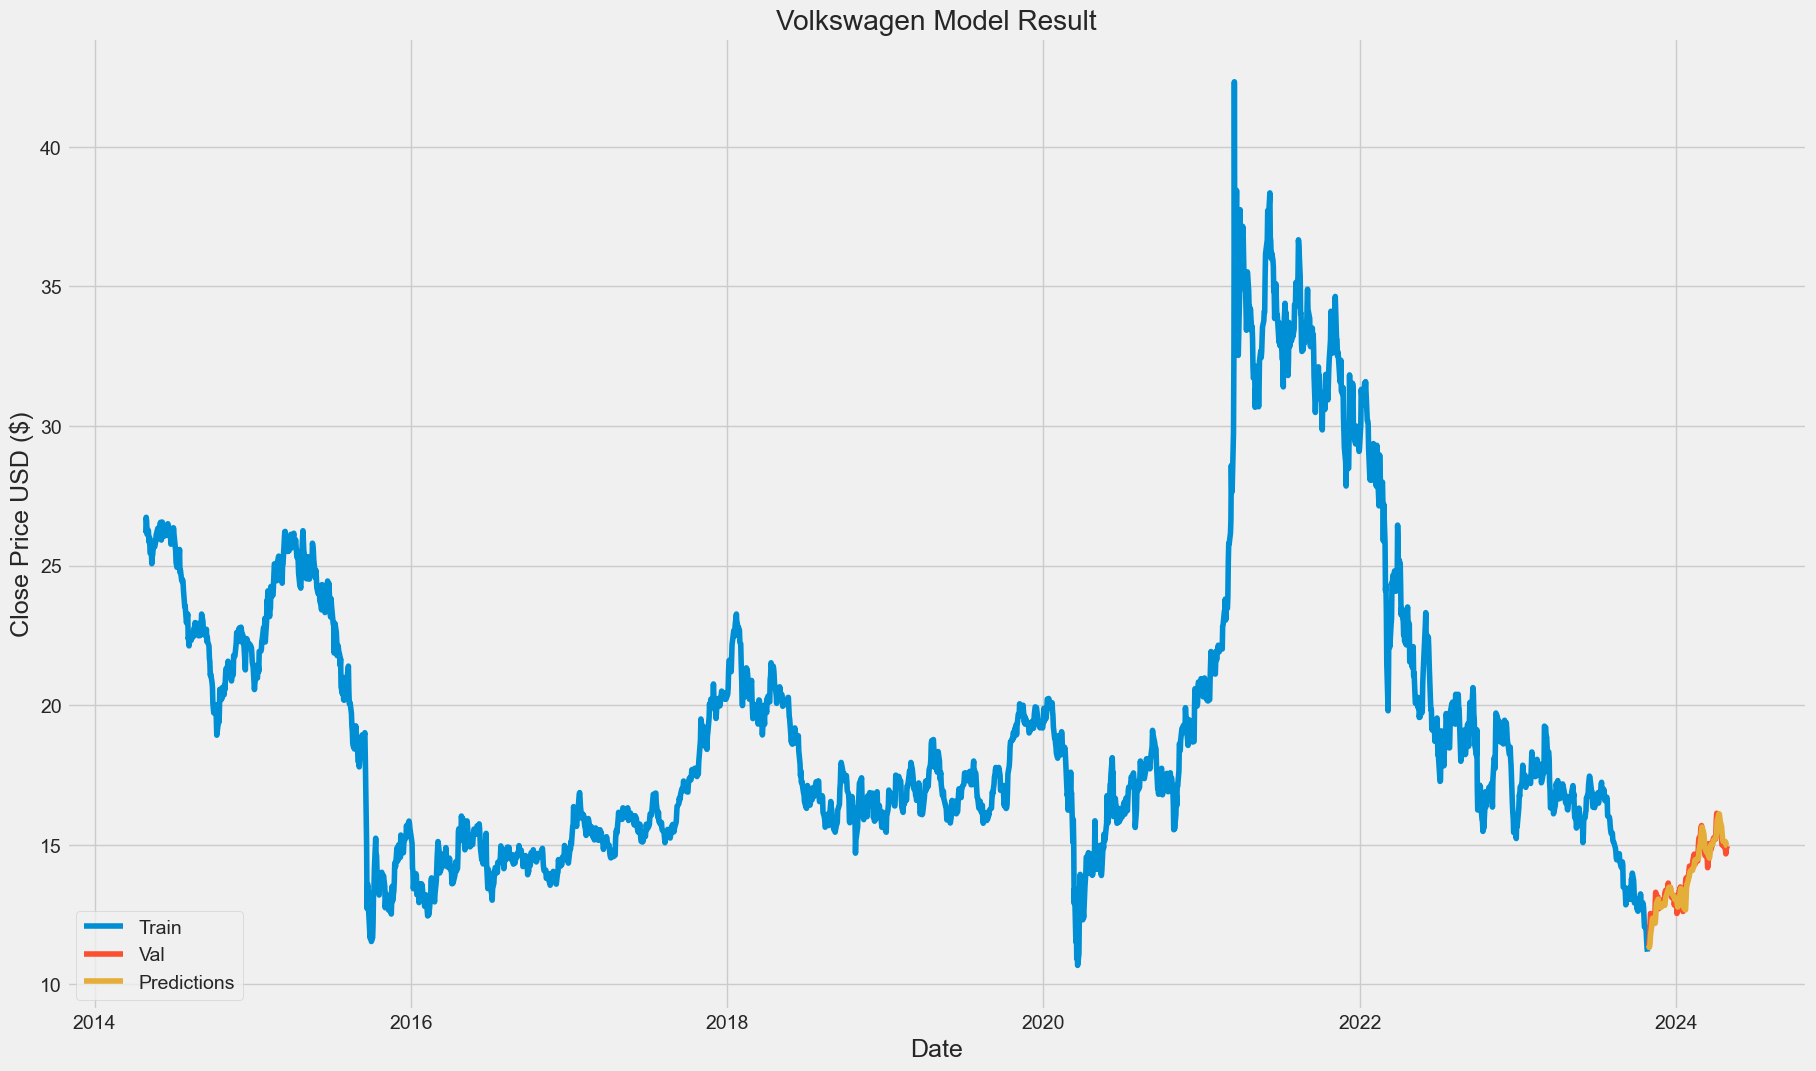

In [37]:
train = data_vw[:training_data_len_vw]
valid = data_vw[training_data_len_vw:]
valid['Predictions'] = predictions_vw
# Visualize the data
plt.figure(figsize=(20,12))
plt.title('Volkswagen Model Result')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

# Summary

In this project, I implemented stock datas in Automobile Sector. I hope you like it. :)

Specifically, I show you:

* How to load stock market data from the YAHOO Finance website using yfinance.
* How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
* How to measure the correlation between stocks.
* How to measure the risk of investing in a particular stock.
* How to build LSTM model with keras.
* How to implement prediction algorithm brand by brand. 

If you have any questions, or anything you can keep in touch with me on Linkedin: https://www.linkedin.com/in/cagrikuzulu/